# Fitting the Full Gamma Spectrum


$$ e+g=e'+g' $$
$$ e'=(em+ge-ge',0,-ge'.sin(t),ge-ge'.cos(t)) $$
em^2+2.(ge-ge')+ (ge-ge')^2 - ge'^2.sin^2(t) - (ge-ge')^2.cos^2(t)
em^2+2.(ge-ge')+ (ge-2.ge').ge.sin^2(t)
$$ em' = sqrt[ (em+ge-ge')^2 - ge'^2.sin^2(t) - (ge-ge'.cos(t))^2 ] $$
$$ em' = sqrt[ (em+ge-ge')^2 - ge^2 + 2.ge.ge'.cos(t) ] $$
$$ em' = sqrt[ em^2 + ge'^2 + 2.em.ge + - 2.em.ge'+ 2.ge.ge'.(cos(t) - 1) ] $$

ge-ge' = ge^2/em.(1-cos(t)) / (1 + ge/em.(1-cos(t)))
em+ge-ge' = ( em + (em - ge).ge/em.(1-cos(t)) ) / ( 1 + ge/em.(1-cos(t)) )

$$ p_s(E) = A_s \cdot \delta(E-E_\gamma) $$
$$ p_c(E) = A_c \cdot \left(\frac{1}{\sigma} \frac{\partial\sigma}{\partial\Omega}\right)_E $$
$$ p_e(E) = A_e \cdot \left(\frac{1}{\sigma} \frac{\partial\sigma}{\partial\Omega}\right)_{E_\gamma-E}~? $$


$$ p_r(E) \sim \mathcal{N}(E|\mu=0,\sigma=\sigma_r) = e^{-E^2/\left(2\sigma_r^2\right)} / \left(\sigma_r \sqrt{2\pi}\right) $$

$$ p_{\text{spectrum}} = p_s(E) + p_c(E) + p_e(E) $$
$$ p_{\text{spectrum+response}}(E) = p_{s+r}(E) + p_{c+r}(E) + p_{e+r}(E) 
    = p_{\text{spectrum}}(E)*p_{\text{response}}(E)$$


$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \sin^2\theta\right) $$
$$ E = E_\gamma / \left(1 + \frac{E_\gamma}{m_e}(1-\cos\theta)\right) $$
$$ \theta = \cos^{-1}\left(1 - m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right)\right) $$

$$ \sin^2\left(\cos^{-1}x\right) = 1 - x^2 $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \left(1 - \left(1 - m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right)\right)^2\right)\right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - \left(1 - \left(1 - 2m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right) + m_e^2 \cdot \left(\frac{1}{E^2} - \frac{2}{EE_\gamma} + \frac{1}{E_\gamma^2}\right) \right)\right)\right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E}{E_\gamma}\right)^2 \left(\frac{E}{E_\gamma} + \frac{E_\gamma}{E} - 2m_e \cdot \left(\frac{1}{E} - \frac{1}{E_\gamma}\right) + m_e^2 \cdot \left(\frac{1}{E^2} - \frac{2}{EE_\gamma} + \frac{1}{E_\gamma^2}\right) \right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(\frac{E^3}{E_\gamma^3} + \frac{E}{E_\gamma} - 2m_e \cdot \left(\frac{E}{E_\gamma^2} - \frac{E^2}{E_\gamma^3}\right) + m_e^2 \cdot \left(\frac{1}{E_\gamma^2} - \frac{2E}{E_\gamma^3} + \frac{E^2}{E_\gamma^4}\right) \right) $$
$$ \frac{\partial\sigma}{\partial\Omega} = \frac{r_e^2}{2} \left(
    \frac{m_e^2}{E_\gamma^2} +
    E \cdot \left( \frac{1}{E_\gamma} - \frac{2m_e}{E_\gamma^2} - \frac{2m_e^2}{E_\gamma^3} \right) +
    E^2 \cdot \left( \frac{2m_e}{E_\gamma^3} + \frac{m_e^2}{E_\gamma^4} \right) +
    \frac{E^3}{E_\gamma^3}
\right) $$




In [164]:
from pathlib import Path

import numpy as np
import numba as nb
import scipy as sp
from scipy.special import gamma
from scipy.optimize import curve_fit, basinhopping

import matplotlib.pyplot as plt

import functools
import ROOT

import colorama


x = np.arange(20).reshape(1, -1)
x[x > 11]

array([12, 13, 14, 15, 16, 17, 18, 19])

In [165]:
# https://stackoverflow.com/questions/52331944/cache-decorator-for-numpy-arrays
from typing import Callable
import numpy as np
from functools import cache, wraps


def np_cache(function):
    @cache
    def cached_wrapper(*args, **kwargs):

        args = [np.array(a) if isinstance(a, tuple) else a for a in args]
        kwargs = {
            k: np.array(v) if isinstance(v, tuple) else v for k, v in kwargs.items()
        }

        return function(*args, **kwargs)

    @wraps(function)
    def wrapper(*args, **kwargs):
        args = [tuple(a) if isinstance(a, np.ndarray) else a for a in args]
        kwargs = {
            k: tuple(v) if isinstance(v, np.ndarray) else v for k, v in kwargs.items()
        }
        return cached_wrapper(*args, **kwargs)

    wrapper.cache_info = cached_wrapper.cache_info
    wrapper.cache_clear = cached_wrapper.cache_clear

    return wrapper

In [166]:
# Helper Functions for the Fits

def gausn(x, m, s, normalized=True):
    # if isinstance(s, np.ndarray):
    #         s = np.repeat(s, x.shape[1], 1) # this is ugly bur it works
    # elif not isinstance(s, np.ndarray):
    #     s = s * np.ones_like(x)
    # # out = ( s==0 ).astype(float)
    # out = ( s>0 ).astype(float)
    # # print(x.shape, s.shape, (s>0).sum())
    # out[s>0] = np.exp(-((x[s>0]-m)/s[s>0])**2 / 2) / (s[s>0] * (2*np.pi)**0.5) 
    # out = np.exp(-((x-m)/s)**2 / 2) / (s * (2*np.pi)**0.5) 
    top = np.divide(x-m, s, where=s>0)
    out = np.divide(np.exp(-(top)**2 / 2), s * (2*np.pi)**0.5, where=s>0) 
    if normalized: #! using the sum/integral breaks convolutions
        out *= abs(x[1]-x[0]) # /= out.sum() # /= np.trapz(out, x)
    # out[~np.isfinite(out)] = 0
    return out

def poisn(x, l, normalized=True):
    out = ( (0 <= x) & (x < 5*l) ).astype(float)
    out[out>0] = np.power(l, x[out>0]) * np.exp(-l) / gamma(x[out>0] + 1)
    if normalized: #! using the sum/integral breaks convolutions
        out *= abs(x[1]-x[0]) # /= out.sum() # /= np.trapz(out, x) 
    return out


def find_main_peak(hist, move_param):
    for i in range(3):
        if i == 0:
            # bin = 0;       underflow bin
            # bin = 1;       first bin with low-edge xlow INCLUDED
            # bin = nbins;   last bin with upper-edge xup EXCLUDED
            # bin = nbins+1; overflow bin
            centers = np.array([hist.GetBinCenter(ibin) for ibin in range(1, hist.GetNbinsX())])
            content = np.array([hist.GetBinContent(ibin) for ibin in range(1, hist.GetNbinsX())])
            A, mu = 0, 0
            for ic, (ce, co) in enumerate(zip(centers[::-1], content[::-1])):
                if ic < 10:
                    continue
                left = np.mean(content[::-1][ic:ic+move_param])
                right = np.mean(content[::-1][ic-move_param:ic])
                center = np.mean(content[::-1][ic-5:ic+5])

                if center > left and center > right and center > np.mean(content) and abs(left-right)*2/(left+right) < 0.1:# and center > A:
                    mu, A = ce, co
                    # print(hist.GetName(), mu, A)
                    return mu, A

        return 0,0


def find_main_peak_statistical(hist, move_param=7):
    def pass_stats(a, b=0, nsigma=1, do_abs=False): 
        if do_abs:
            return abs(a - b) > nsigma * ( a + b )**0.5
        return (a - b) > nsigma * ( a + b )**0.5
    
    # bin = 0;       underflow bin
    # bin = 1;       first bin with low-edge xlow INCLUDED
    # bin = nbins;   last bin with upper-edge xup EXCLUDED
    # bin = nbins+1; overflow bin
    if isinstance(hist, tuple) and isinstance(hist[0], (list, np.ndarray)):
        centers, content = hist[0], hist[1]
    else:
        centers = np.array([hist.GetBinCenter(ibin) for ibin in range(1, hist.GetNbinsX())])
        content = np.array([hist.GetBinContent(ibin) for ibin in range(1, hist.GetNbinsX())])
    
    centers, content = centers[::-1], content[::-1] # look at the histogram RTL
    content_max = np.max(content)
    mean_rtl = np.cumsum(content) / np.arange(1, len(content)+1)
    global_thresh = min(content.mean(), np.median(content))

    for ic in range(move_param+move_param//2+1, len(centers)-move_param-move_param//2-1): 
        # if ic < 10:
        #     continue

        # find averages in small windows around the center 
        # left/right is the original left/right hence the indices
        cl , cr = int(ic + (move_param+1)/2), int(ic - move_param/2)
        center = np.mean( content[ cr : cl ] ) # [ic-5:ic+5])
        left = np.mean( content[ cl : cl + move_param ] ) # [ic:ic+move_param])
        right = np.mean( content[ cr - move_param : cr ] ) # [ic-move_param:ic])
        mean = mean_rtl[ic]

        # sides_are_balanced = (abs(left-right)*2/(left+right) < 0.1) # diff is less tha 10% of their average
        # center_is_peak = center > left and  center > right
        # center_above_average = center > np.mean(content)
        sides_are_balanced = not pass_stats(left, right, do_abs=True) # diff is less than 1 sigma of 0
        center_is_peak = pass_stats(center, left) and pass_stats(center, right)
        center_above_average = pass_stats(center, mean) and center > global_thresh # diff is greater than 1 sigma

        # x_center = np.mean( centers[ ic - move_param : ic + move_param ] )
        x_center = ((centers*content)[cr:cl]).sum() / content[cr:cl].sum()
        x_left = ((centers*content)[cl:cl+move_param]).sum() / content[cl:cl+move_param].sum()
        x_right = ((centers*content)[cr-move_param:cr]).sum() / content[cr-move_param:cr].sum()

        # marker = '#' if center_above_average else '-'
        # color = colorama.Fore.RED + colorama.Style.BRIGHT if center_is_peak else ''
        # color += colorama.Back.GREEN if sides_are_balanced else ''

        # print(color + f"{centers[ic]:>4.0f} -> {x_center:>4.0f} | ({left:>4.0f}, {center:>4.0f}, {right:>4.0f}), {mean:>3.0f} -> {sides_are_balanced*1}, {center_is_peak*1}, {center_above_average*1}  | " + marker*int(80*center/content_max))
        # print(colorama.Style.RESET_ALL)

        if  center_is_peak and sides_are_balanced and center_above_average:
            # mu, A = x_center, center
            bkg = np.median(mean_rtl[:ic])
            # print(x_left, x_center, x_right, left, center, right, bkg)
            sigma_left = (x_center-x_left)/( -2*np.log((left-bkg)/(center-bkg)) )**0.5
            sigma_right = (x_right-x_center)/( -2*np.log((right-bkg)/(center-bkg)) )**0.5

            return x_center, center, (sigma_left+sigma_right)/2

    return 0,0,0#mu, A
    # print("Failed to intelligently find the peak")
    # return 800, -1


# Compton Fit & Helpers
electron_mass = 511 # keV

def compton_energy(energy_in, theta):
    return energy_in / ( 1 + energy_in / electron_mass * (1 - np.cos(theta)))

def compton_theta(energy_in, energy_out):
    return np.arccos(1 - electron_mass * (1/energy_out - 1/energy_in))

def klein_nishina_v1(energy_in, energy_out):
    re = 1

    energy_in = np.asarray(energy_in)
    energy_out = np.asarray(energy_out)
    minE, maxE = energy_in/(1+2*energy_in/electron_mass), energy_in
    maskE = (minE <= energy_out) & (energy_out <= maxE)

    eOeI = energy_out/energy_in
    theta = compton_theta(energy_in, energy_out)
    out = 1/2 * re**2 * (eOeI)**2 * (eOeI + 1/eOeI - np.sin(theta)**2) #* np.sin(theta)
    out[~maskE] = 0

    return out


ps 1 1.0
pg 1.000755385706301 1.000755385706301
pe 1.0007553857063007 0.9990516296113914
ps_smear 1.0 1.0000000000000002
pg_smear nan nan
pe_smear 1.0014623624751546 1.0014623624751546
ps 1 1.0
pg 1.0013166822210464 1.0013166822210464
pe 1.0013166822210464 1.0008971130125484
ps_smear 0.9999811816762524 0.9999804592461358
pg_smear 1.0015845053953403 1.0015844976590713
pe_smear 1.001204158945886 1.0012041589458862


/tmp/ipykernel_1085738/4224278586.py:14: RuntimeWarning: overflow encountered in square
  out = np.divide(np.exp(-(top)**2 / 2), s * (2*np.pi)**0.5, where=s>0)
/tmp/ipykernel_1085738/4224278586.py:14: RuntimeWarning: invalid value encountered in square
  out = np.divide(np.exp(-(top)**2 / 2), s * (2*np.pi)**0.5, where=s>0)


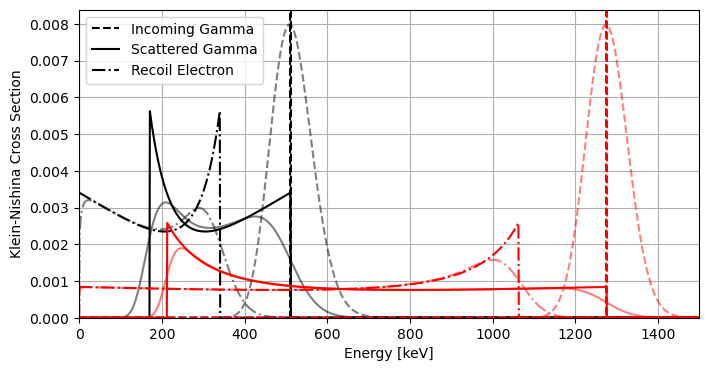

In [167]:
re, me = 1, 511 # electron radius, mass
eg = 511
# de = 0.1
de = 1
e = np.arange(0, 1500, de)
# e = np.arange(0, 900, de)
# t = np.arccos(1 - me*(1/e - 1/eg))

s = 50
# x = np.arange(-5*s, 5*s, de)
# r = np.exp(-(x/s)**2/2)/(s*(2*np.pi)**0.5)

@cache
def kn_xs(eg):
    a = np.pi * re**2 * me / eg**2 #! math says this is supposed to be negative?
    elow, ehigh = eg/(1+2*eg/me), eg
    elow = a*((2*me/eg + (me/eg)**2)*elow + (elow**2/2)/eg + (eg-2*me*(1+me/eg))*np.log(elow) - me**2/elow)
    ehigh = a*((2*me/eg + (me/eg)**2)*ehigh + (ehigh**2/2)/eg + (eg-2*me*(1+me/eg))*np.log(ehigh) - me**2/ehigh)
    return ehigh - elow

def kn(e, eg=511, normalized=True):
    a = ( np.pi * re**2 / kn_xs(eg) ) * ( me / eg**2 ) # * (-1)**(e[1]<e[0])
    out = ( (eg/(1+2*eg/me) <= e) & (e <= eg) ).astype(float)
    out[out>0] = a*(2*me/eg + (me/eg)**2 + e[out>0]/eg + (eg-2*me*(1+me/eg))/e[out>0] + (me/e[out>0])**2)
    if normalized: #! using the sum/integral breaks convolutions
        out *=  abs(e[1]-e[0]) # /= out.sum() # /= np.trapz(out, e) 
    return out

def kn_smear(e, eg, s):
    de = abs(e[1]-e[0])
    z = np.arange(eg/(1+2*eg/me)-de, eg+de, de)
    # z = np.arange(eg/(1+2*eg/me), eg, de)

    e = e.reshape(-1,1)
    if isinstance(s, np.ndarray):
        s = s.reshape(-1,1)
    pg_smear = np.trapz(gausn(e - z, 0, s, normalized=False)*kn(z, eg), z, axis=1)
    return pg_smear

kn = np_cache(kn)
kn_smear = np_cache(kn_smear)

###########

plt.figure(figsize=(8,4))
ymax = 0
# for _eg, c in zip([137, 511, 662, 1275], ["k","r","g","b"]):
for _eg, c in zip([511, 1275], ["k","r"]):
    # if _eg != 511:
    #     continue
    ps = np.zeros_like(e)
    ps[np.argmin(np.abs(e-_eg))] = 1
    pg = kn(e, _eg)
    pe = kn(_eg - e, _eg)
    # ps = np.convolve(ps, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    # pg = np.convolve(pg, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    # pe = np.convolve(pe, gausn(np.arange(-6*s, 6*s, de), 0, s), "same")
    print("ps", ps.sum(), np.trapz(ps, e))
    print("pg", pg.sum(), np.trapz(pg, e))
    print("pe", pe.sum(), np.trapz(pe, e))


    plt.plot(e,ps, c+"--", label=("Incoming Gamma" if ymax==0 else ""))
    plt.plot(e,pg, c+"-", label=("Scattered Gamma" if ymax==0 else ""))
    plt.plot(e,pe, c+"-.", label=("Recoil Electron" if ymax==0 else ""))

    _s = s * (e/_eg)**0.5
    # _s = s * (e/_eg)**2 
    # _s = s * (e/_eg)
    # _s = s
    ps_smear = gausn(e, _eg, _s)
    pg_smear = kn_smear(e, _eg, _s)
    pe_smear = kn_smear(_eg - e, _eg, _s)
    print("ps_smear", ps_smear.sum(), np.trapz(ps_smear, e))
    print("pg_smear", pg_smear.sum(), np.trapz(pg_smear, e))
    print("pe_smear", pe_smear.sum(), np.trapz(pe_smear, e))
    plt.plot(e,ps_smear, c+"--", alpha=0.5)
    plt.plot(e,pg_smear, c+"-", alpha=0.5)
    plt.plot(e,pe_smear, c+"-.", alpha=0.5)

    ymax = max(ymax, pg.max(), pe.max(), ps_smear.max(), pg_smear.max(), pe_smear.max())

plt.xlim(0, e.max())
plt.ylim(0, 1.05*ymax)
# plt.ylim(1e-5, 2*ymax)
# plt.yscale("log")
plt.xlabel("Energy [keV]")
plt.ylabel("Klein-Nishina Cross Section")
plt.legend()
plt.grid()

In [168]:
ch = -1

module_100090_Vov3.00_Nspe10000_Nsodium100000.root 0
popt = [ 0, 58, 816, 2524, 1537, 1537, 0, 2547, 2547 ]
popt = [ -239, 53, 823, 2082, 1603, 1286, 1614, 7104, 0 ]
0.06471817009758941


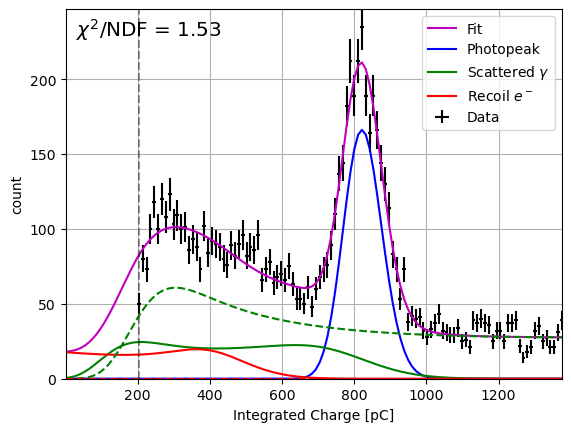

In [169]:

def bi_modal(x, a1, m1, s1, a2, m2, s2, m, c):
    return (
        a1 * np.exp(-(((x - m1) / s1) ** 2))
        + a2 * np.exp(-(((x - m2) / s2) ** 2))
        + m * x
        + c
    )

def full_spectrum(x, *args):
    o, s = None, 0
    m1, a1, ac1, ae1 = 0, 0, 0, 0
    a2, ac2, ae2 = None, None, None
    c = None
    energy0 = 511 # keV, for Na22
    energy02 = 1275 # kev, for Na22 2nd photopeak

    # pad x to x=0 (needed for conv)
    # dx = x[1] - x[0]
    # x0 = x*1.
    # if x[0] > 0:
    #     x = np.arange(x.max(), 0, -dx)[::-1]

    match len(args):
        case 5:
            s, m1, a1, ac1, ae1 = args
        case 6:
            s, m1, a1, ac1, ae1, c = args
        case 7:
            s, m1, a1, ac1, ae1, ac2, ae2 = args
        case 8:
            o, s, m1, a1, ac1, ae1, ac2, ae2 = args
        case 9:
            o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = args
        case _:
            raise ValueError(f"args length = {len(args)}")

    # # # Case 1:
    # # # 1a: 261 107
    # # # s = s * ( np.maximum(1e-10, x/(m1+o)) )**0.5
    # x = x - o
    # # # 1b: 262 226
    # s = s * ( np.maximum(1e-10, x/m1) )**0.5
    # ex = energy0*x/m1
    # m2 = energy02/energy0*m1

    # Case 2:
    ex = energy0*(x - o)/(m1 - o)
    m2 = energy02/energy0*(m1-o) + o
    # 2a: 263 111
    # s = s * ( np.maximum(1e-10, x/m1) )**0.5
    # 2b: 263 120
    s = s * ( np.maximum(1e-10, (x - o)/(m1 - o)) )**0.5

    out = np.zeros_like(x, dtype=float)

    if a1 > 0:
        sigg = a1 * gausn(x, m1, s)
        # print(f"{(~np.isfinite(sigg)).sum()=}")
        out += sigg

    if ac1 > 0:
        # sigc = ac1 * klein_nishina(energy0, ex)
        sigc = ac1 * kn_smear(ex, energy0, s)
        # print(f"{(~np.isfinite(sigc)).sum()=}")
        out += sigc

    if ae1 > 0:
        # sige = ae1 * klein_nishina(energy0, energy0 - ex)
        sige = ae1 * kn_smear(energy0 - ex, energy0, s)
        # print(f"{(~np.isfinite(sige)).sum()=}")
        out += sige


    if a2 > 0:
        sigg2 = a2 * gausn(x, m2, s)
        # print(f"{(~np.isfinite(sigg2)).sum()=}")
        out += sigg2

    if ac2 > 0:
        # sigc2 = ac2 * klein_nishina(energy02, ex)
        sigc2 = ac2 * kn_smear(ex, energy02, s)
        # print(f"{(~np.isfinite(sigc2)).sum()=}")
        out += sigc2

    if ae2 > 0:
        # sige2 = ae2 * klein_nishina(energy02, energy02 - ex)
        sige2 = ae2 * kn_smear(energy02 - ex, energy02, s)
        # print(f"{(~np.isfinite(sige2)).sum()=}")
        out += sige2

    # if s is not None and s > 0:
    #     edge = 5*s#min(m1-dx, 5*s)
    #     x2 = np.arange(((-5*s)//dx)*dx, ((5*s)//dx + 1)*dx, dx)
    #     # response = pois(x2, s)
    #     response = gaus(x2, 0, s)
    #     # response = gaus(x2, 0, s) * (x2>=0)
    #     # response = gaus(x2, 0, s * ((m1+x2)/m1)**0.5)
    #     out2 = np.convolve(out, response, "same")
    #     # out2 = [np.convolve(out*(ex == e), gaus(np.arange(((-5*s)//dx)*dx, ((5*s)//dx + 1)*dx, dx), 0, s*(e/energy0)**2)) for e in ex if e > 0]
    #     # if len(out2):
    #     #     out2 = np.sum(out2, 0)
    #     # else:
    #     #     out2 = 0 * out
    #     if len(out2) > len(out):
    #         lo, lo2 = len(out), len(out2)
    #         out = out2[(lo2-lo)//2:lo2 - (lo2-lo+1)//2]
    #     else:
    #         out = out2


    # if c is not None and c > 0:
    #     out = out + c

    # if len(out) != len(x0):
    #     out = out[-len(x0):]

    return out
# full_spectrum = np_cache(full_spectrum)

ch+=1
ch = ch%32
# print(ch)
# chi2s = []
# ch = 0
# ch += 1
fname = "module_100090_Vov3.00_Nspe10000_Nsodium100000.root"
# fname = "module_200060_Vov3.00_Nspe10000_Nsodium100000.root"
# fname = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"

file_path = "/home/psimmerl/module_testing/data/from_alex_june1/" + fname

print(fname, ch)
file = ROOT.TFile.Open(file_path)

hist = file.Get(f"sodium_ch{ch}")

x_data = np.array([hist.GetBinCenter(i) for i in range(1,hist.GetNbinsX()+1)])
y_data = np.array([hist.GetBinContent(i) for i in range(1,hist.GetNbinsX()+1)])

yerr_data = np.maximum(y_data,1)**0.5
if x_data[0] > 0:
    x = np.arange(x_data.max(), 0, -(x_data[1]-x_data[0]))[::-1]
    y = np.append(np.zeros(len(x)-len(x_data)), y_data)
else:
    x, y = x_data, y_data
yerr = np.append(np.zeros(len(x)-len(x_data)), yerr_data)
# print(cparam_tuple)


def estimate_compton_pars(x, y, move_param=7):
    m1, content_m1, s = find_main_peak_statistical((x, y), move_param=move_param) 
    if m1 < 3*move_param:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0]


    emax_ae1 = (511 - 511/(1 + 2*511/511))
    emax_ae2 = (1275 - 1275/(1 + 2*1275/511))

    dip_pos, content_dip, sigma_dip = find_main_peak_statistical((x[x<m1], y.max()-y[x<m1]), move_param=move_param) 

    o = 0
    if m1/2 < dip_pos and dip_pos < m1:
        ae1_ideal = m1 * emax_ae1/511
        ae1_peak_pos, content_ae1_peak, sigma_ae1_peak = find_main_peak_statistical((x[x<dip_pos], y[x<dip_pos]), move_param=move_param) 

        # print(f"{o=}, {m1=}, {dip_pos=}, {ae1_peak_pos=}, {emax_ae1=}")
        # print(f"{m1-o=}, {511*(m1-o)/(m1-o)=}, {511*(ae1_peak_pos-o)/(m1-o)=}, {ae1_peak_pos-o=}")
        if ae1_peak_pos < 3*move_param:
            ae1_peak_pos = m1 - 2*(m1-dip_pos)
            # print("did not find ae1 peak", ae1_peak_pos)

        # emax_ae1 = 511*(ae1_peak_pos-o)/(m1-o)
        # emax_ae1/511*(m1-o) = ae1_peak_pos - o
        # emax_ae1/511*m1 - ae1_peak_pos = o * (emax_ae1/511 - 1)
        # o = (emax_ae1/511*m1 - ae1_peak_pos) / (emax_ae1/511 - 1)
        # o = ae1_ideal - ae1_peak_pos
        # m1 = m1 - o
        o = (ae1_peak_pos - emax_ae1/511*m1) / (1 - emax_ae1/511)
        o = abs(o) * (1 if ae1_peak_pos < ae1_ideal else -1)
        # o = 511*ae1_peak_pos/m1 - emax_ae1
        # emax_ae1 = 511*(ae1_peak_pos-o)/(m1-o)
    #         # o = (emax_ae1*m1/511 - ae1_peak_pos) * 511/emax_ae1
    #         o = ae1_peak_pos - emax_ae1/511 * m1
    #         print("offset? =", o)
    #         print("peak after offset ae1? =", emax_ae1 * (m1-o)/511)
    #         # m1 = m1 - o
    #         # print("peak after offset m1? =", m1)
    # else:
    #     o = 0
    #     # print("did not find dip", dip_pos)
    else:
        o=0
        # print("did not find dip")
    # print(f"{o=}")

    dx = x[1] - x[0]
    m2 = m1/511 * (1275 + o)
    xmin_ae1 = m1/511 * (0 + o)
    xmin_ae2 = m1/511 * (0 + o)
    xmax_ae1 = m1/511 * (emax_ae1 + o)
    xmax_ae2 = m1/511 * (emax_ae2 + o)
    # m2 = 1275/511 * m1
    # xmin_ae1 = 0/511 * (0 + o)
    # xmin_ae2 = 0/511 * (0 + o)
    # xmax_ae1 = emax_ae1/511 * m1 + o
    # xmax_ae2 = emax_ae2/511 * m1 + o
    # print(xmax_ae1, m1, xmax_ae2, m2)

    mask_right = ( m1 < x ) & ( x < xmax_ae2 )
    mask_right_sig = ( m1 < x ) & ( x < m1+3*s )
    mask_right_bkg = ( m1+3*s < x ) & ( x < xmax_ae2 )
    mask_left = x < xmax_ae1
    xmin = x.min()
    # mask_right = ( m1 < x-o ) & ( x-o < xmax_ae2 )
    # mask_right_sig = ( m1 < x-o ) & ( x-o < m1+3*s )
    # mask_right_bkg = ( m1+3*s < x-o ) & ( x-o < xmax_ae2 )
    # mask_left = x-o < xmax_ae1
    # xmin = x.min()-o

    bkg = np.median(y[mask_right_bkg]) # constant part of the 2nd recoil e spectrum, evts/bin
    a1 = y[mask_right_sig].sum() # half gaussian plus the bkg from ac2 and ae2
    a1 = 2*(a1 - bkg*mask_right_sig.sum())
    ae2 = bkg * (xmax_ae2-xmin_ae2)/dx # not actually flat everywhere but good approx esp. with E>>me

    # ae1 = ( y[mask_left].sum() - a1/2 - bkg*mask_left.sum() ) *  xmax_ae1/(xmax_ae1 - x.min())
    ae1 = ( y[mask_left].sum() - bkg*mask_left.sum() ) *  (xmax_ae1-xmin_ae1)/(xmax_ae1 - xmin)
    # ae1 = ( y[mask_left].sum() - a1/2 - bkg*mask_left.sum() ) # usually overstimate because of backscatter so dont bother reweighting 

    ac2, ae2 = ae2/2, ae2/2
    ac1, ae1 = ae1/2, ae1/2

    a2 = 0
    if m2-1*s < x.max():
        a2 = y[(m2-3*s < x) & (x < m2+3*s)].sum()# * (6*s) / (min(m2+3*s,x.max())-(m2-3*s))

    return [o, s, m1, a1, ac1, ae1, a2, ac2, ae2]


bounds = [
    [-500, 5, 0, 0, 0, 0, 0, 0, 0, ],
    [500, 100, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6, 1e6],
]

# o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = *cparam_tuple
o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = 0, 50, 500, 7000, 300, 6000, 600, 2000, 3000
popt = [o, s, m1, a1, ac1, ae1, a2, ac2, ae2]

min_charge = x_data.min()#200
# bounds[0][2] = min_charge
if y_data.any():
    popt = estimate_compton_pars(x_data, y_data)

print("popt = [ " + ", ".join([f"{par:.0f}" for par in popt]) + " ]")
popt[0] = 0

if y_data.any():
    # res = basinhopping(
    #     loss,
    #     popt,
    #     # niter=1000,
    #     minimizer_kwargs={ "method":"Nelder-Mead", "bounds":np.array(bounds).T },
    # )
    # print(res)
    # popt = res.x
    popt, pcov = curve_fit(
        full_spectrum,
        x_data[x_data > min_charge],
        y_data[x_data > min_charge],
        p0=popt,
        sigma=yerr_data[x_data > min_charge],
        bounds=bounds,
        # method="dogbox",
    )
print("popt = [ " + ", ".join([f"{par:.0f}" for par in popt]) + " ]")
o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = popt

# s = 0
y_spectrum = full_spectrum(x, o, s, m1, a1, ac1, ae1, a2, ac2, ae2)
y_sg = full_spectrum(x, o, s, m1, a1, 0, 0, 0, 0, 0)
y_sc = full_spectrum(x, o, s, m1, 0, ac1, 0, 0, 0, 0)
y_se = full_spectrum(x, o, s, m1, 0, 0, ae1, 0, 0, 0)
y_sg2 = full_spectrum(x, o, s, m1, 0, 0, 0, a2, 0, 0)
y_sc2 = full_spectrum(x, o, s, m1, 0, 0, 0, 0, ac2, 0)
y_se2 = full_spectrum(x, o, s, m1, 0, 0, 0, 0, 0, ae2)

# print(f"{y_spectrum.sum()=}")
# print(f"{y_sg.sum()=}")
# print(f"{y_sc.sum()=}")
# print(f"{y_se.sum()=}")
# print(f"{y_sg2.sum()=}")
# print(f"{y_sc2.sum()=}")
# print(f"{y_se2.sum()=}")

calc_chi2 = lambda p: ( ((full_spectrum(x_data[x_data>min_charge], *p) - y_data[x_data>min_charge])/yerr_data[x_data>min_charge])**2 ).sum()
chi2, ndf = calc_chi2( popt ), len(x_data[x_data>min_charge]) - ( len(popt) )

xs, ys = 8*[x], [y, y_spectrum, y_sg, y_sc, y_se, y_sg2, y_sc2, y_se2]
cs = ["k", "m-", "b-", "g-", "r-", "b--", "g--", "r--"]
ls = ["Data", "Fit", "Photopeak", "Scattered $\gamma$", "Recoil $e^-$", "", "", ""]

fig, ax = plt.subplots()
for xx, yy, cc, ll in zip(xs, ys, cs, ls):
    if "Data" in ll and yerr.any():
        ax.errorbar(xx, yy, yerr, (xx[1]-xx[0])/2, c=cc[0], ls=cc[1:], label=ll)
    else:
        ax.plot(xx, yy, cc, label=ll)
ax.plot([min_charge, min_charge], [0, 1e5], "k--", alpha=0.4)


ax.text(0.02, 0.98, f"$\chi^2$/NDF = {chi2/ndf:.2f}", size="x-large", ha="left", va="top", transform=ax.transAxes)

ax.set_xlabel("Integrated Charge [pC]")
ax.set_ylabel("count")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 1.05*max([yy.max() for yy in ys]))

# ax.set_ylim( max([yy.min() for yy in ys if yy.min() > 0])/5, 2*max([yy.max() for yy in ys]))
# ax.set_ylim( y_data.min()/3, y_data.max()*3)
# ax.set_yscale("log")
ax.legend()
ax.grid()

print(popt[1]/popt[2])


In [170]:
def fit_modified(file_path, CHANNEL, source):
    fit_info = {}
    fit_info[CHANNEL] = {}
    #plt.figure(figsize=(8, 6))
    # Open the ROOT file
    file_path = "/home/psimmerl/module_testing/data/from_alex_june1/" + file_path
    file = ROOT.TFile.Open(file_path)

    # Retrieve the "sodium_ch0" tree from the file
    sodium_tree = file.Get(f"{source}_ch{CHANNEL}")
    bin_width = sodium_tree.GetBinWidth(30)

    # Get the number of entries in the tree
    num_entries = len(sodium_tree)

    sodium_tree = file.Get(f"{source}_ch{CHANNEL};1")
    num_entries = len(sodium_tree)
    sodium_data = np.zeros(num_entries)
    bins = np.zeros(num_entries)

    hard_edge = sodium_tree.GetBinCenter(0)
    for i in range(num_entries):
        sodium_data[i] = sodium_tree.GetBinContent(i)
        bins[i] = sodium_tree.GetBinCenter(i)
    
    #idx_start = sodium_tree.FindBin(200)
    # Close the ROOT file
    found_fit = False

    #to set the upper bound that we sweep over, determine maximum after 100, then divide by two, and add buffer
    #sweep in increments of 10, starting from 50 lower than upper bound
    peak_distance_param = 2
    #print(sodium_tree.FindBin(100)+1)
    for move_param in np.arange(5, 30, 5):
        mu, A = find_main_peak(sodium_tree, move_param)
        #print(mu,A)
        initial_cuts = np.arange(100, 200, 10)
        peak_position = np.argmin(abs(bins-mu))
        #for initial_cut in initial_cuts:
            #maxPosition = np.argmax(sodium_data[sodium_tree.FindBin(initial_cut)+1:])+sodium_tree.FindBin(initial_cut)+1
            #print("maxPosition: ", maxPosition)
            #print("max X Position: ", sodium_tree.GetBinCenter(int(maxPosition)))
            #print(sodium_tree.GetBinCenter(int(maxPosition)))
        end_sweep = sodium_tree.GetBinCenter(int(peak_position))/peak_distance_param
        #print("end_sweep: ", end_sweep)
        back_param = 50; buffer = 0
        if end_sweep-back_param < hard_edge:
            back_param = end_sweep - hard_edge
        if end_sweep < hard_edge:
            end_sweep = hard_edge; back_param = 0; buffer=10
            #print("back_Param =0")
        for start_bin in np.arange(end_sweep-back_param, end_sweep+buffer, 10):
            fit_info[CHANNEL][(start_bin, move_param)] = {}
            idx_start = sodium_tree.FindBin(start_bin)
            #file.Close()
            
            x = bins
            y = sodium_data
            x_original = bins
            y_original = sodium_data
        
            # smooth the data
            '''
            step = 100
            y_smooth = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
        
            # find the first local minimum for the cutoff
            
            idx_min_1 = 0
            for i in range(idx_start, len(y_smooth)):
                if y_smooth[i] < y_smooth[i - 1] and y_smooth[i] < y_smooth[i + 1]:
                    idx_min_1 = i
                    break
            #print("idx_min_1", idx_min_1)
            
            '''
            #idx_min_1=0
            #list local maxima
            step = 40
            y_smooth_max = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
            
            # find the first local minimum for the cutoff
            '''
            maxima = []
            for i in range(1, len(y_smooth_max)):
                if y_smooth_max[i] > y_smooth_max[i - 1] and y_smooth_max[i] > y_smooth_max[i + 1]:
                    maxima.append(i*bin_width*len(y_smooth_max)/num_entries)
                    
            #print(maxima)
            '''
            idx_end = -10
            
            
             # smooth the data
            step = 30
            y_smooth = np.convolve(y, np.ones(step), "same") / step
        
            
            idx_max_2 = peak_position
            idx_max_1 = int((idx_max_2 - idx_start) / peak_distance_param + idx_start)
        
            #idx_start = idx_max_1 - 10
            '''
            plt.axvline(x=x[idx_start], color="black", linestyle="--", label="Lower cutoff")
            plt.axvline(x=x[idx_max_1], color="blue", linestyle="--", label="Peak 1 Guess")
            plt.axvline(x=x[idx_max_2], color="red", linestyle="--", label="Peak 2 Guess")
            plt.axvline(x=x[idx_end], color="black", linestyle="--", label="Upper cutoff")
            '''
        
        
            # cut the data
            x_cut = x[idx_start:idx_end]
            y_cut = y[idx_start:idx_end]
            x = x[idx_start:idx_end]
            y = y[idx_start:idx_end]
            idx_max_2 -= idx_start
            idx_max_1 -= idx_start
        
            # smooth the data for the fitting (need more details)
            # step = 10
            step = 10
            y = np.convolve(y, np.ones(step), "same") / step
            #if y[idx_max_2]<num_events/1000: print("continuing"); continue;
            # Initial guess for the parameters
            #print(y[idx_max_2], x[idx_max_2])
            p0_bi = [
                # a, mean, sigma
                y[idx_max_1], x[idx_max_1], 10, 
                y[idx_max_2], x[idx_max_2], 10, 
                # m, c
                -0.01, 10]
            #print(y[idx_max_2])
            low = -10000; high = 10000
            #bounds = ([low, low, low, num_events/1000, low, low, -0.1, low],[high, high, high, high, high, high, 0, high])
            bounds = ([y[idx_max_1]/5, low, low, low, low, low, -0.1, low],[y[idx_max_1]*5, high, high, high, high, high, 0, high])
            # Perform the curve fitting
            try:
                popt, pcov = curve_fit(bi_modal, x, y, p0=p0_bi, bounds=bounds)
                found_fit = True
            
            except RuntimeError:
                continue 
            a1, m1, s1, a2, m2, s2, m, c = popt
        
            # chi2 = np.sum((bi_modal(x, *popt) - y) ** 2)
            chi2 = np.sum((bi_modal(x_cut, *popt) - y_cut)**2 / np.maximum(1,y_cut))
            ndf = len(x_cut) - sum(y_cut==0) - (len(popt))
    
            
            fit_info[CHANNEL][(start_bin, move_param)]["Param_List"] = [a1, m1, s1, a2, m2, s2, m, c]
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared"] = chi2
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared/NDF"] = chi2 / ndf


    if not found_fit:
        print(f"Fit does not converge for channel {CHANNEL}")
        return 
        
    min_chi2 = 100000000; bestKey = 0
    for key, value in fit_info[CHANNEL].items():
        if "Chi-Squared" not in list(value.keys()): continue;
        if value["Chi-Squared"] < min_chi2:
            min_chi2 = value["Chi-Squared"]
            bestKey = key
    dd = fit_info[CHANNEL][bestKey]
    chi2 = dd["Chi-Squared"]
    chi2ndf = dd["Chi-Squared/NDF"]
    # print(f"ch{CHANNEL:<2} | Chi2 = {chi2:>5.3f} | Chi2/NDF = {chi2ndf:>5.3f} ")
    #print(bestKey)

    #print("Best Key: ", bestKey)
    # Generate points for the fitted curve
    x_fit = np.linspace(bestKey[0], np.max(x), 1000)
    #y_fit = bi_modal(x_fit, a1, m1, s1, a2, m2, s2, m, c)
    #print(x_fit)
    y_fit = bi_modal(x_fit, *fit_info[CHANNEL][bestKey]["Param_List"])
    #print(ch, ": ",fit_info[CHANNEL][bestKey]["Param_List"])
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared"]
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]
    return x_original, y_original, x, y, x_fit, y_fit, dd["Param_List"], fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]

In [171]:
def fit_compton(file_path, CHANNEL, source):
    fit_info = {}
    fit_info[CHANNEL] = {}
    #plt.figure(figsize=(8, 6))
    # Open the ROOT file
    file_path = "/home/psimmerl/module_testing/data/from_alex_june1/" + file_path
    file = ROOT.TFile.Open(file_path)

    # Retrieve the "sodium_ch0" tree from the file
    sodium_tree = file.Get(f"{source}_ch{CHANNEL}")
    bin_width = sodium_tree.GetBinWidth(30)

    # Get the number of entries in the tree
    num_entries = len(sodium_tree)

    sodium_tree = file.Get(f"{source}_ch{CHANNEL};1")
    num_entries = len(sodium_tree)
    sodium_data = np.zeros(num_entries)
    bins = np.zeros(num_entries)
    hard_edge = sodium_tree.GetBinCenter(0)
    # print(f"{hard_edge=}")
    for i in range(num_entries):
        sodium_data[i] = sodium_tree.GetBinContent(i)
        bins[i] = sodium_tree.GetBinCenter(i)
    # for i in range(sodium_tree.GetNbinsX()):
    #     sodium_data[i] = sodium_tree.GetBinContent(i+1)
    #     bins[i] = sodium_tree.GetBinCenter(i+1)
    
    #idx_start = sodium_tree.FindBin(200)
    # Close the ROOT file
    found_fit = False

    #to set the upper bound that we sweep over, determine maximum after 100, then divide by two, and add buffer
    #sweep in increments of 10, starting from 50 lower than upper bound
    peak_distance_param = 2
    #print(sodium_tree.FindBin(100)+1)
    for move_param in np.arange(5, 30, 5):
    # for move_param in np.arange(10, 21, 5): #!
        # mu, A = find_main_peak(sodium_tree, move_param)
        mu, A = find_main_peak(sodium_tree, move_param)
        mu2, A2, s2 = find_main_peak_statistical(sodium_tree,move_param)
        if mu ==0 and mu2 != 0:
            # print("statistcal won")
            mu = mu2
        elif mu !=0 and mu2 == 0:
            pass
            # print("old way won")
        elif mu ==0 and mu2 == 0:
            continue
            # print("both failed")
        else:
            mu = mu2
            # print(f"{mu}, {mu2}, {s}")
            # print(f"{abs(mu-mu2)/s2  if s2 else 0=:}")
        #print(mu,A)
        initial_cuts = np.arange(100, 200, 10)
        peak_position = np.argmin(abs(bins-mu))
        #for initial_cut in initial_cuts:
            #maxPosition = np.argmax(sodium_data[sodium_tree.FindBin(initial_cut)+1:])+sodium_tree.FindBin(initial_cut)+1
            #print("maxPosition: ", maxPosition)
            #print("max X Position: ", sodium_tree.GetBinCenter(int(maxPosition)))
            #print(sodium_tree.GetBinCenter(int(maxPosition)))
        end_sweep = mu/peak_distance_param#sodium_tree.GetBinCenter(int(peak_position))/peak_distance_param
        #print("end_sweep: ", end_sweep)
        back_param = 50; buffer = 0
        # back_param = 200; buffer = 0
        # back_param = 999; buffer = 0
        # print(f"{move_param=}, {mu=}, {peak_position=}, {A=}, {end_sweep}")
        if mu == 0:
            # print(f"{move_param=}: {mu=} -- skipping!")
            continue
        if mu > 3/4*bins[-2]:
            continue
        # if end_sweep-back_param < hard_edge:
        #     back_param = end_sweep - hard_edge
        # if end_sweep < hard_edge:
        #     end_sweep = hard_edge; back_param = 0; buffer=10
            #print("back_Param =0")
        # print(f"{end_sweep}, {end_sweep-back_param=}, {end_sweep+buffer=}")
        for start_bin in np.arange(end_sweep-back_param, end_sweep+buffer, 10): #!
        # for start_bin in bins[10:5:60]:#np.arange(end_sweep-back_param, end_sweep+buffer, 10):
        # for start_bin in bins[1:2:20]:
        # for start_bin in np.linspace(hard_edge, end_sweep, 20):
        # for start_bin in np.linspace(hard_edge, mu, 20):
            fit_info[CHANNEL][(start_bin, move_param)] = {}
            idx_start = sodium_tree.FindBin(start_bin)
            #file.Close()
            
            x = bins
            y = sodium_data
            x_original = bins
            y_original = sodium_data
        
            # smooth the data
            '''
            step = 100
            y_smooth = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
        
            # find the first local minimum for the cutoff
            
            idx_min_1 = 0
            for i in range(idx_start, len(y_smooth)):
                if y_smooth[i] < y_smooth[i - 1] and y_smooth[i] < y_smooth[i + 1]:
                    idx_min_1 = i
                    break
            #print("idx_min_1", idx_min_1)
            
            '''
            #idx_min_1=0
            #list local maxima
            step = 40
            y_smooth_max = np.convolve(y, np.ones(step), "same") / step
            # plt.plot(x, y, label="Smoothed data")
            
            # find the first local minimum for the cutoff
            '''
            maxima = []
            for i in range(1, len(y_smooth_max)):
                if y_smooth_max[i] > y_smooth_max[i - 1] and y_smooth_max[i] > y_smooth_max[i + 1]:
                    maxima.append(i*bin_width*len(y_smooth_max)/num_entries)
                    
            #print(maxima)
            '''
            idx_end = -10
            
            
             # smooth the data
            step = 30
            y_smooth = np.convolve(y, np.ones(step), "same") / step
        
            
            idx_max_2 = peak_position
            idx_max_1 = int((idx_max_2 - idx_start) / peak_distance_param + idx_start)
        
            #idx_start = idx_max_1 - 10
            '''
            plt.axvline(x=x[idx_start], color="black", linestyle="--", label="Lower cutoff")
            plt.axvline(x=x[idx_max_1], color="blue", linestyle="--", label="Peak 1 Guess")
            plt.axvline(x=x[idx_max_2], color="red", linestyle="--", label="Peak 2 Guess")
            plt.axvline(x=x[idx_end], color="black", linestyle="--", label="Upper cutoff")
            '''
        
        
            # cut the data
            x_cut = x[idx_start:idx_end]
            y_cut = y[idx_start:idx_end]
            x = x[idx_start:idx_end]
            y = y[idx_start:idx_end]
            idx_max_2 -= idx_start
            idx_max_1 -= idx_start
        
            # smooth the data for the fitting (need more details)
            # step = 10
            # step = 10 #!
            # y_smooth = np.convolve(y, np.ones(step), "same") / step #!
            #if y[idx_max_2]<num_events/1000: print("continuing"); continue;
            # Initial guess for the parameters
            #print(y[idx_max_2], x[idx_max_2])
            # popt = estimate_compton_pars(x, y_smooth, move_param=move_param)

            # offset = 0
            # popt = [
            #     # o, s, m1, a1, ac1, ae1, ae2, c
            #     offset,
            #     50,
            #     mu-offset,
            #     2000,#y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 2,
            #     100,#y.sum()/20,
            #     2000,#y.sum()/10,#y[idx_max_1]*30*(2*np.pi)**0.5 / 20,
            #     0*y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 2,
            #     100*y.sum()/20,
            #     2000,#y.sum()/5,#y[idx_max_1]*30*(2*np.pi)**0.5 / 20,
            # ]


            popt = estimate_compton_pars(x, y, move_param=move_param)
            popt[0] = 0
            # print("popt = [ " + ", ".join([f"{par:.0f}" for par in popt]) + " ]")
            if popt[1] == 0:
                continue
            # print(popt)
            # print(y[idx_max_1]*30*(2*np.pi)**0.5)
            #print(y[idx_max_2])
            low = -10000; high = max(1e6,y.sum())#20000
            #bounds = ([low, low, low, num_events/1000, low, low, -0.1, low],[high, high, high, high, high, high, 0, high])
            bounds = [
                [-200, 1, 0, 0, 0, 0, 0, 0, 0],
                [200, high, high, high, high, high, high, high, high],
                # [-300, 5, 0, 0, 0, 0, 0, 0, 0, ],
                # [300, 100, high, high, high, high, 1, 1, high, ],
                # [0, 5, 0, 0, 0, 0, 0, 0, ],
                # [mu/2, 100, high, high, high, high, high, high, ],
                # [-200, 0, 0, 0, 0, 0, 0, 0, ],
                # [200, 100, high, high, high, high, high, high, ],
                # [0, 0, x[idx_max_1]*1/2, 0, 0, 0, 0, 0, ],
                # [x[idx_max_1]/2, 100, x[idx_max_1]*3/2, high, high, high, high, high, ],
            ]
            # Perform the curve fitting
            # print(f"fit_range = ({x_cut[0]=}, {x_cut[-1]=})")
    
            popt = [p if lb<p and p<ub else lb for p, lb, ub in zip(popt, *bounds)]
            # full_spectrum_reduced = lambda x, *args: full_spectrum(x, args[0], args[1], args[2], args[3], args[4], args[5], 0, 0, args[6])
            # bounds_reduced = [
            #     [-200, 1, 0, 0, 0, 0, 0],
            #     [200, high, high, high, high, high, high],
            # ]
            # popt = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[7]]


            try:
                popt, pcov = curve_fit(
                    full_spectrum,
                    # full_spectrum_reduced,
                    x_cut,
                    y_cut,
                    p0=popt,
                    sigma=np.maximum(y_cut,1)**0.5,
                    bounds=bounds,
                    # bounds=bounds_reduced,
                )
                found_fit = True
            
            except RuntimeError:
                continue 
            # s, m1, a1, ac1, ae1, ae2, c = popt
            ndf = len(x_cut) - sum(y_cut==0) - ( len(popt) )

            # popt = [popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], 0, 0, popt[6]]

            # chi2 = np.sum((full_spectrum(x, *popt) - y) ** 2)
            chi2 = np.sum((full_spectrum(x_cut, *popt) - y_cut)**2 / np.maximum(1,y_cut))
            # print(f"{move_param:>3.0f} : chi2 = {chi2/ndf:>6.2f}, xrange = ({x_cut[0]=}, {x_cut[-1]=}) ")
    
            
            fit_info[CHANNEL][(start_bin, move_param)]["Param_List"] = popt
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared"] = chi2
            fit_info[CHANNEL][(start_bin, move_param)]["Chi-Squared/NDF"] = chi2 / ndf


    if not found_fit:
        print(f"Fit does not converge for channel {CHANNEL}")
        return 
        
    min_chi2 = 100000000; bestKey = 0
    for key, value in fit_info[CHANNEL].items():
        if "Chi-Squared/NDF" not in list(value.keys()): continue;
        if value["Chi-Squared/NDF"] < min_chi2:
            min_chi2 = value["Chi-Squared/NDF"]
            bestKey = key
        # if "Chi-Squared" not in list(value.keys()): continue;
        # if value["Chi-Squared"] < min_chi2:
        #     min_chi2 = value["Chi-Squared"]
        #     bestKey = key
    dd = fit_info[CHANNEL][bestKey]
    params = dd["Param_List"]
    chi2 = dd["Chi-Squared"]
    chi2ndf = dd["Chi-Squared/NDF"]
    # print(f"ch{CHANNEL:<2} | Chi2 = {chi2:>5.3f} | Chi2/NDF = {chi2ndf:>5.3f} ")
    #print(bestKey)

    #print("Best Key: ", bestKey)
    # Generate points for the fitted curve
    x_fit = x_original
    dx = bins[-1] - bins[-2]
    x_fit = np.arange(bestKey[0], np.max(x)+dx, dx)
    # x_fit = np.linspace(bestKey[0], np.max(x), 1000)
    #y_fit = bi_modal(x_fit, a1, m1, s1, a2, m2, s2, m, c)
    #print(x_fit)
    y_fit = full_spectrum(x_fit, *params)
    #print(ch, ": ",fit_info[CHANNEL][bestKey]["Param_List"])
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared"]
    # return x_original, y_original, x, y, x_fit, y_fit, bestKey, fit_info[CHANNEL][bestKey]["Chi-Squared/NDF"]
    return x_original, y_original, x, y, x_fit, y_fit, params, chi2ndf

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline


/home/psimmerl/mambaforge/envs/pyroot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/psimmerl/mambaforge/envs/pyroot/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 0 &  2.078 &  2.034 &   39.7 &   41.4 &  570.4 & 5521.5 & 2611.6 & 5892.0 &    0.0 & 2814.0 & 1422.9 \\
 1 &  2.047 &  2.075 &   64.3 &   46.9 &  531.3 & 6343.4 & 1165.3 & 6955.9 &  100.6 & 3076.3 & 1435.2 \\
 2 &  2.278 &  2.058 &   56.5 &   46.9 &  565.5 & 6903.6 & 1594.0 & 8121.1 &  343.2 & 2409.5 & 2288.5 \\
 3 &  2.380 &  2.222 &   41.7 &   47.2 &  526.2 & 7489.2 & 1100.0 & 9004.5 &  258.3 & 2543.1 & 2666.6 \\
 4 &  2.561 &  1.941 &   42.1 &   54.0 &  478.8 & 8843.8 &    0.4 & 11077.9 &  586.1 & 1198.3 & 3465.8 \\
 5 &  2.292 &  1.935 &   41.2 &   52.2 &  504.7 & 9056.3 &    0.0 & 12590.2 &  624.5 & 1423.1 & 3619.2 \\
 6 &  2.438 &  2.371 &   33.2 &   40.1 &  444.2 & 8090.6 & 2632.2 & 8373.1 &  381.3 & 2550.8 & 3058.0 \\
 7 &  2.591 &  2.229 &   18.2 &   44.9 &  485.0 & 8290.3 & 2637.8 & 11806.8 &  582.1 & 2053.8 & 3412.2 \\
 8 &  2.621 &  2.354 &   27.6 &   48.5 &  480.7 & 9411.5 & 1621.6 & 13070.3 &  434.7 & 2941.0 & 3098.7 \\
 9 &  2.522 &  2.252 &   36.3 &   48.8 &  448.4 & 9

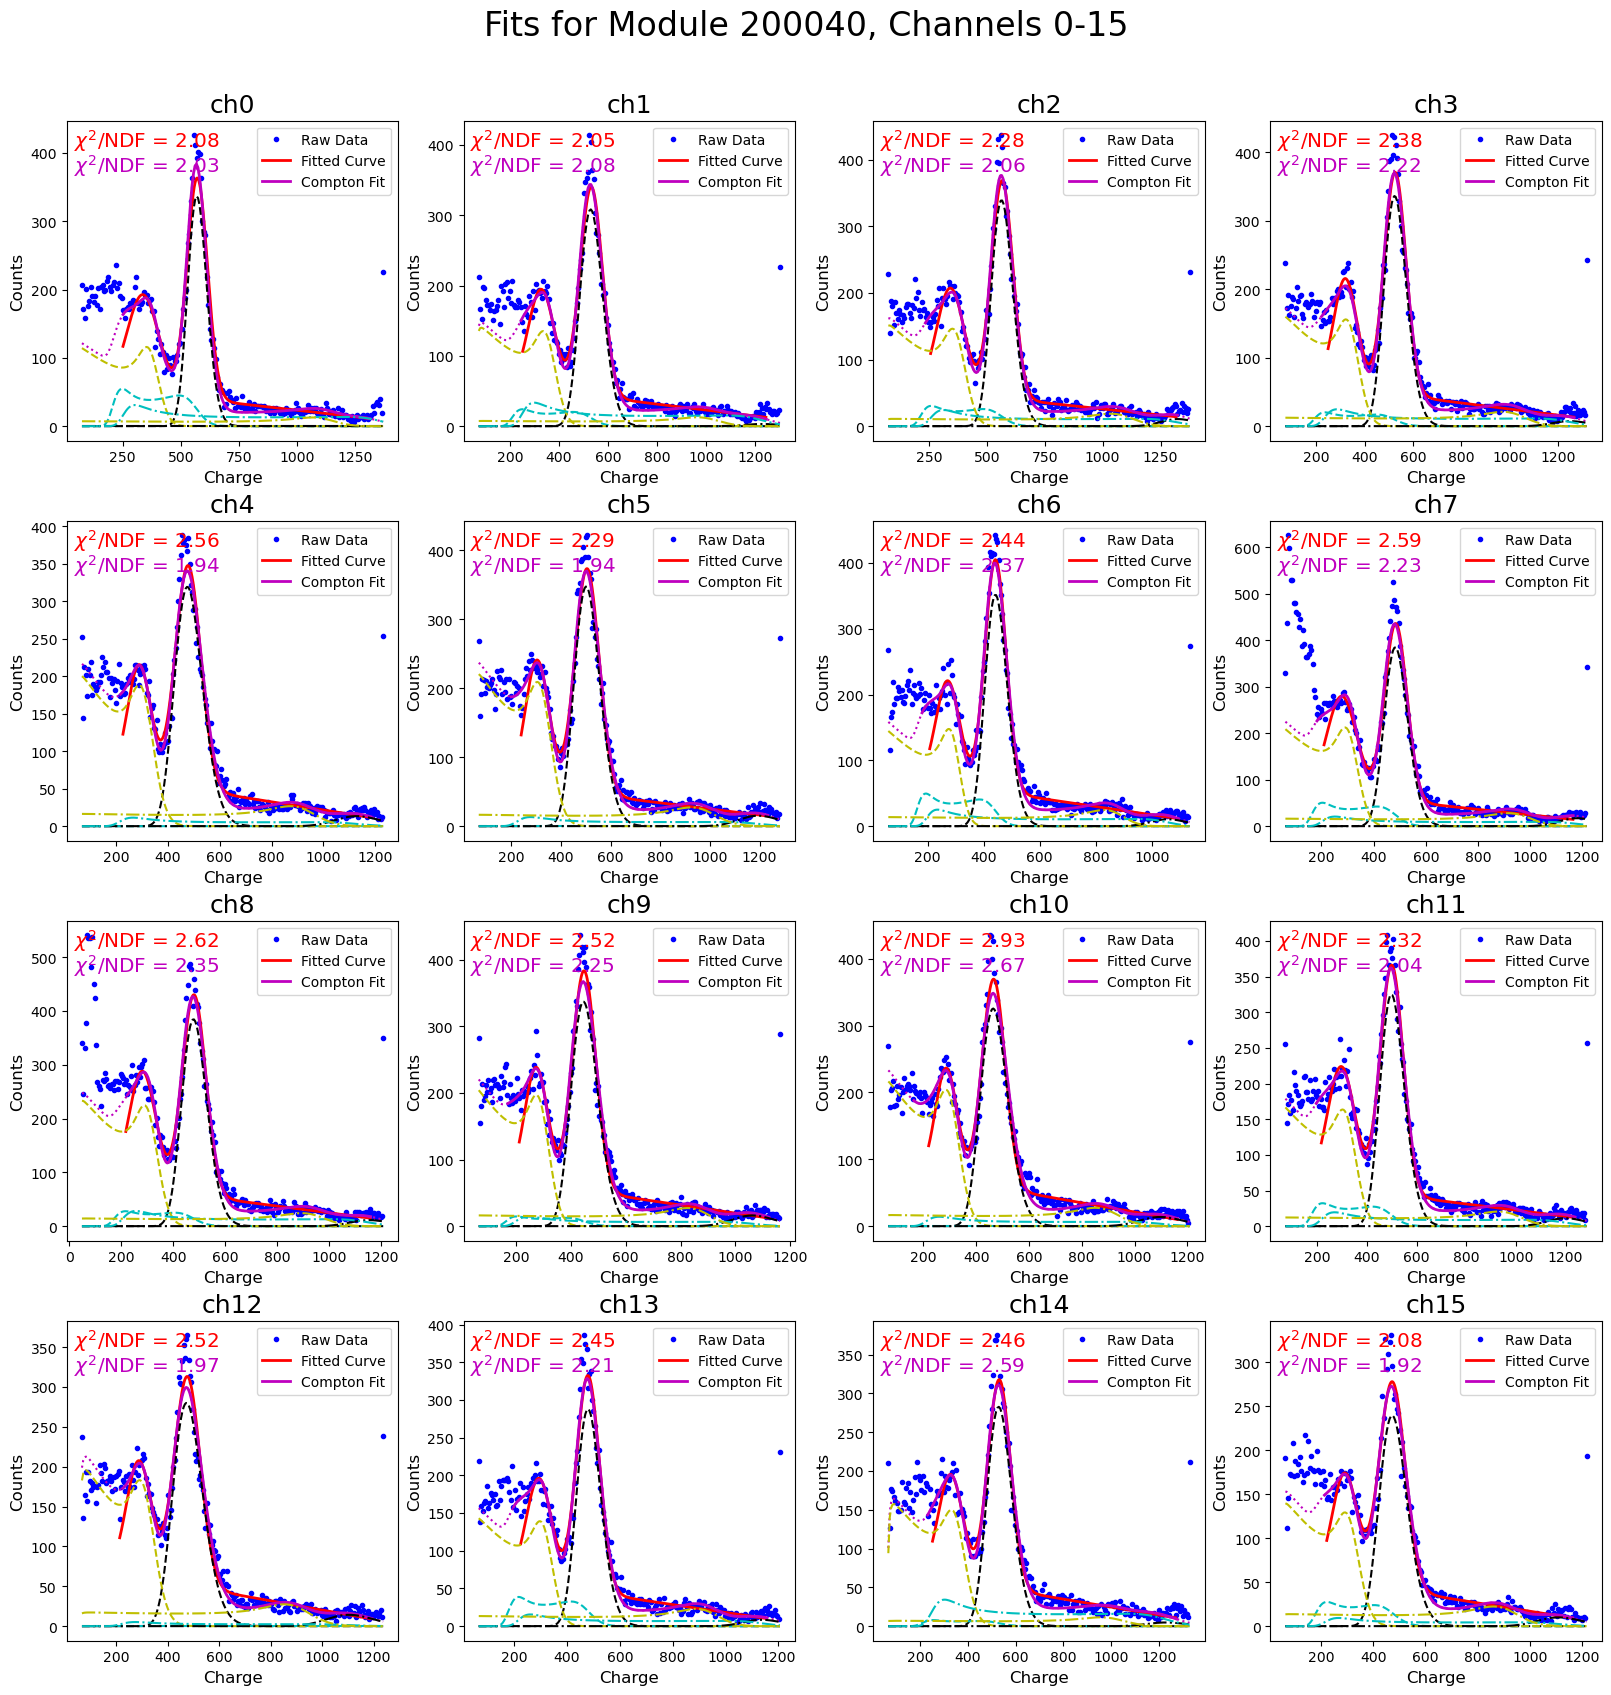

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline
16 &  1.896 &  1.697 &   30.6 &   39.3 &  403.4 & 5844.6 & 2124.5 & 6032.3 &  206.4 & 2431.7 & 1371.2 \\
17 &  1.701 &  1.401 &   40.6 &   51.1 &  449.5 & 6989.3 &  468.2 & 8930.3 &  357.8 & 1914.7 & 2131.7 \\
18 &  1.683 &  1.627 &   39.3 &   45.3 &  473.4 & 6906.8 & 1920.4 & 7829.2 &  314.3 & 2284.6 & 2260.6 \\
19 &  2.044 &  1.883 &   34.8 &   46.1 &  491.7 & 7468.8 & 1436.7 & 9321.4 &  337.4 & 2353.2 & 2609.2 \\
20 &  2.123 &  1.702 &   40.2 &   46.3 &  470.7 & 8232.0 & 1359.4 & 9175.0 &  360.0 & 2698.2 & 2217.1 \\
21 &  2.066 &  1.484 &   42.4 &   54.6 &  488.2 & 9228.3 &    0.0 & 12059.5 &  664.8 & 1459.9 & 3307.7 \\
22 &  1.940 &  1.406 &   50.2 &   56.6 &  505.1 & 9315.3 &    0.0 & 12112.0 &  589.6 & 2139.1 & 2787.5 \\
23 &  2.259 &  1.625 &   34.3 &

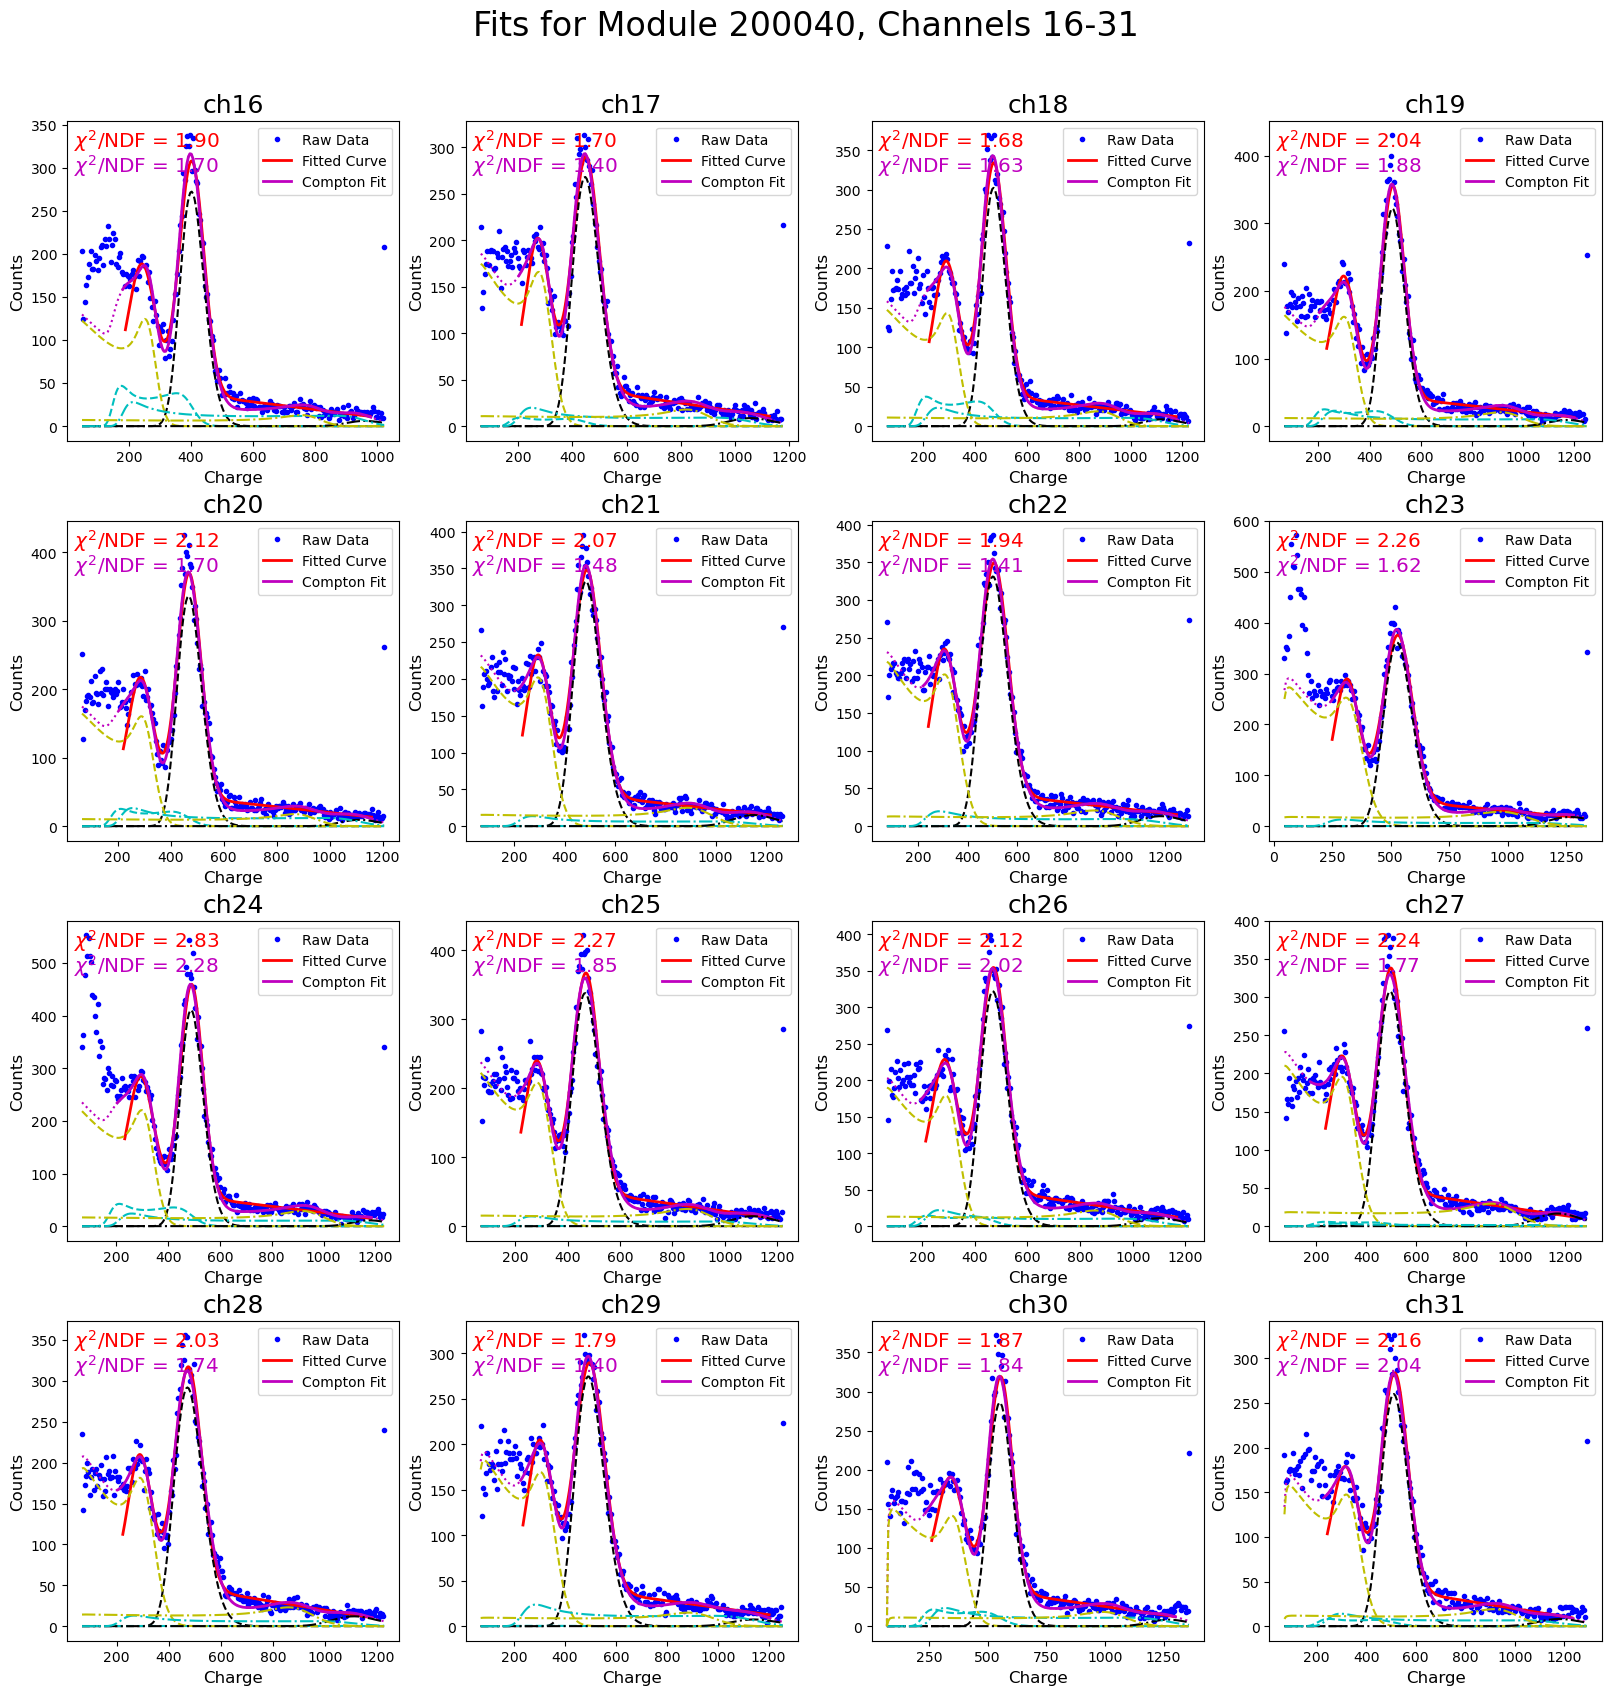

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline
 0 &  1.907 &  2.161 &    8.6 &   22.4 &  240.2 & 5555.2 & 4386.1 & 4369.4 &  266.3 & 2396.3 & 1501.4 \\
 1 &  2.100 &  2.128 &    6.3 &   26.9 &  252.3 & 6536.0 & 3987.3 & 6007.1 &  354.0 & 2441.4 & 1891.3 \\
 2 &  1.750 &  1.798 &   10.2 &   28.0 &  254.5 & 7569.2 & 3836.6 & 6675.5 &  359.4 & 3321.4 & 1617.8 \\
 3 &  1.935 &  2.238 &    9.4 &   21.2 &  208.7 & 7788.5 & 4664.2 & 5556.1 &  425.4 & 2947.4 & 1963.1 \\
 4 &  2.290 &  2.906 &    2.1 &   17.9 &  220.6 & 7888.7 & 5863.5 & 6633.3 &  335.6 & 3482.0 & 2463.2 \\
 5 &  1.895 &  2.032 &    3.9 &   20.0 &  227.0 & 8803.6 & 5574.0 & 7435.4 &  440.1 & 3752.5 & 2552.2 \\
 6 &  1.761 &  2.377 &    4.5 &   18.8 &  223.7 & 9230.5 & 6217.2 & 7662.5 &  383.2 & 3499.2 & 2915.5 \\
 7 &  2.360 &  2.550 &    2.3 &  

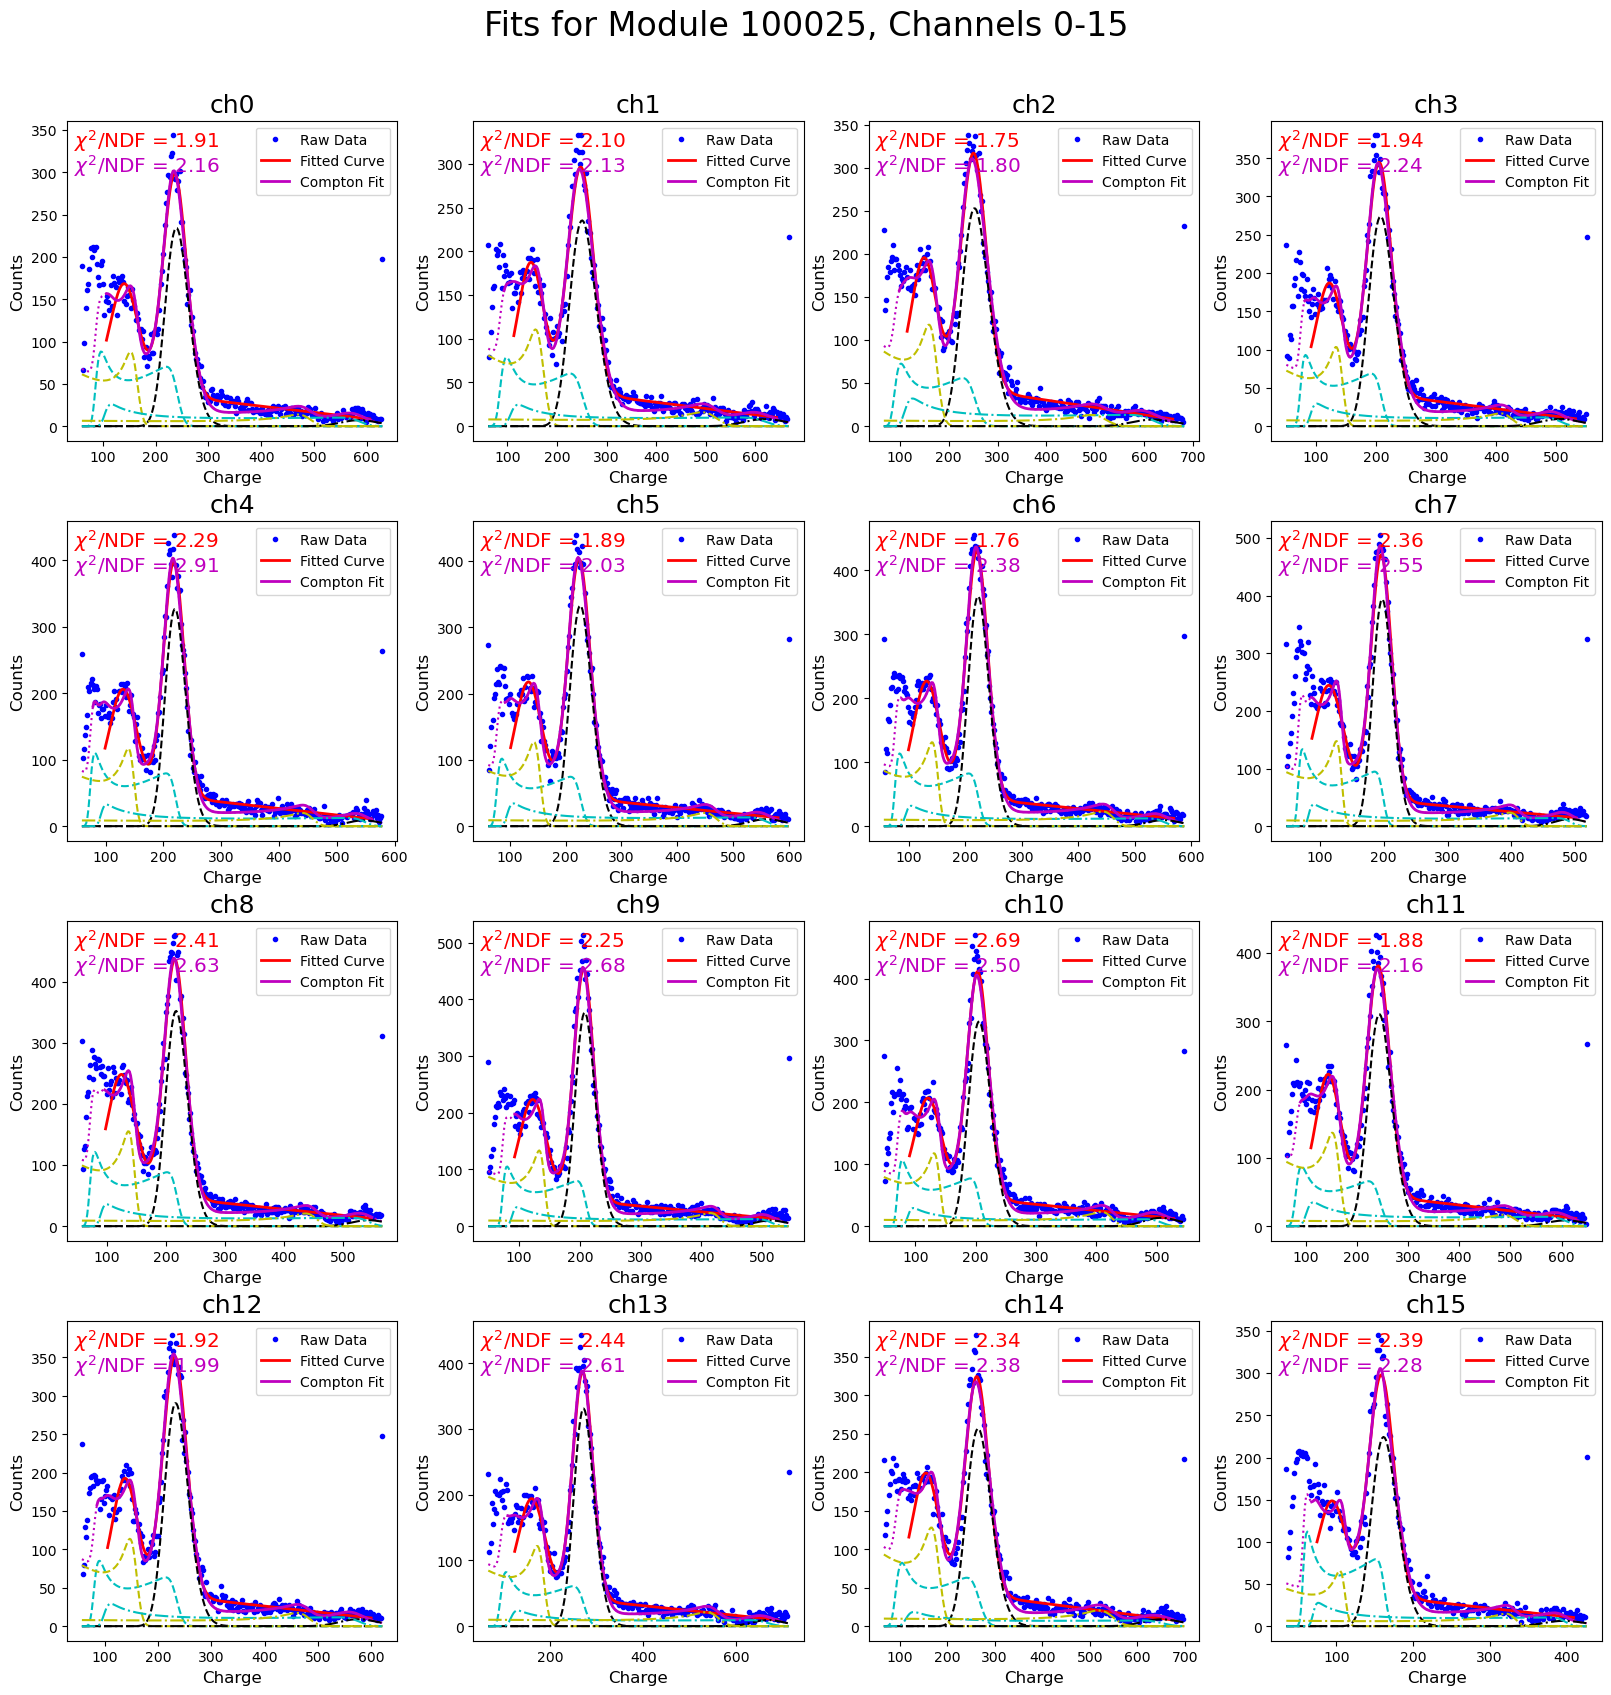

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline
16 &  2.238 &  2.387 &    6.9 &   19.1 &  233.3 & 5455.4 & 4714.9 & 4441.6 &  268.8 & 1835.7 & 1919.9 \\
17 &  2.384 &  2.424 &    7.8 &   23.0 &  245.9 & 6289.7 & 4137.0 & 6027.5 &  347.9 & 2193.7 & 2147.2 \\
18 &  2.226 &  2.140 &   12.2 &   21.3 &  213.7 & 6973.5 & 4740.7 & 4423.0 &  440.7 & 2508.5 & 2203.4 \\
19 &  2.500 &  2.580 &    4.3 &   20.3 &  257.9 & 7480.4 & 5391.0 & 7274.0 &  360.9 & 2568.1 & 2591.9 \\
20 &  1.868 &  2.444 &    5.8 &   19.6 &  230.1 & 8201.0 & 5023.3 & 6932.0 &  378.7 & 3370.4 & 2581.7 \\
21 &  1.859 &  2.095 &    4.1 &   19.0 &  224.4 & 8955.3 & 5346.9 & 7003.7 &  370.2 & 3644.4 & 2474.2 \\
22 &  2.307 &  2.521 &    2.0 &   19.9 &  244.3 & 9288.1 & 6084.8 & 8207.5 &  371.2 & 3680.5 & 2684.2 \\
23 &  2.453 &  2.087 &    2.9 &  

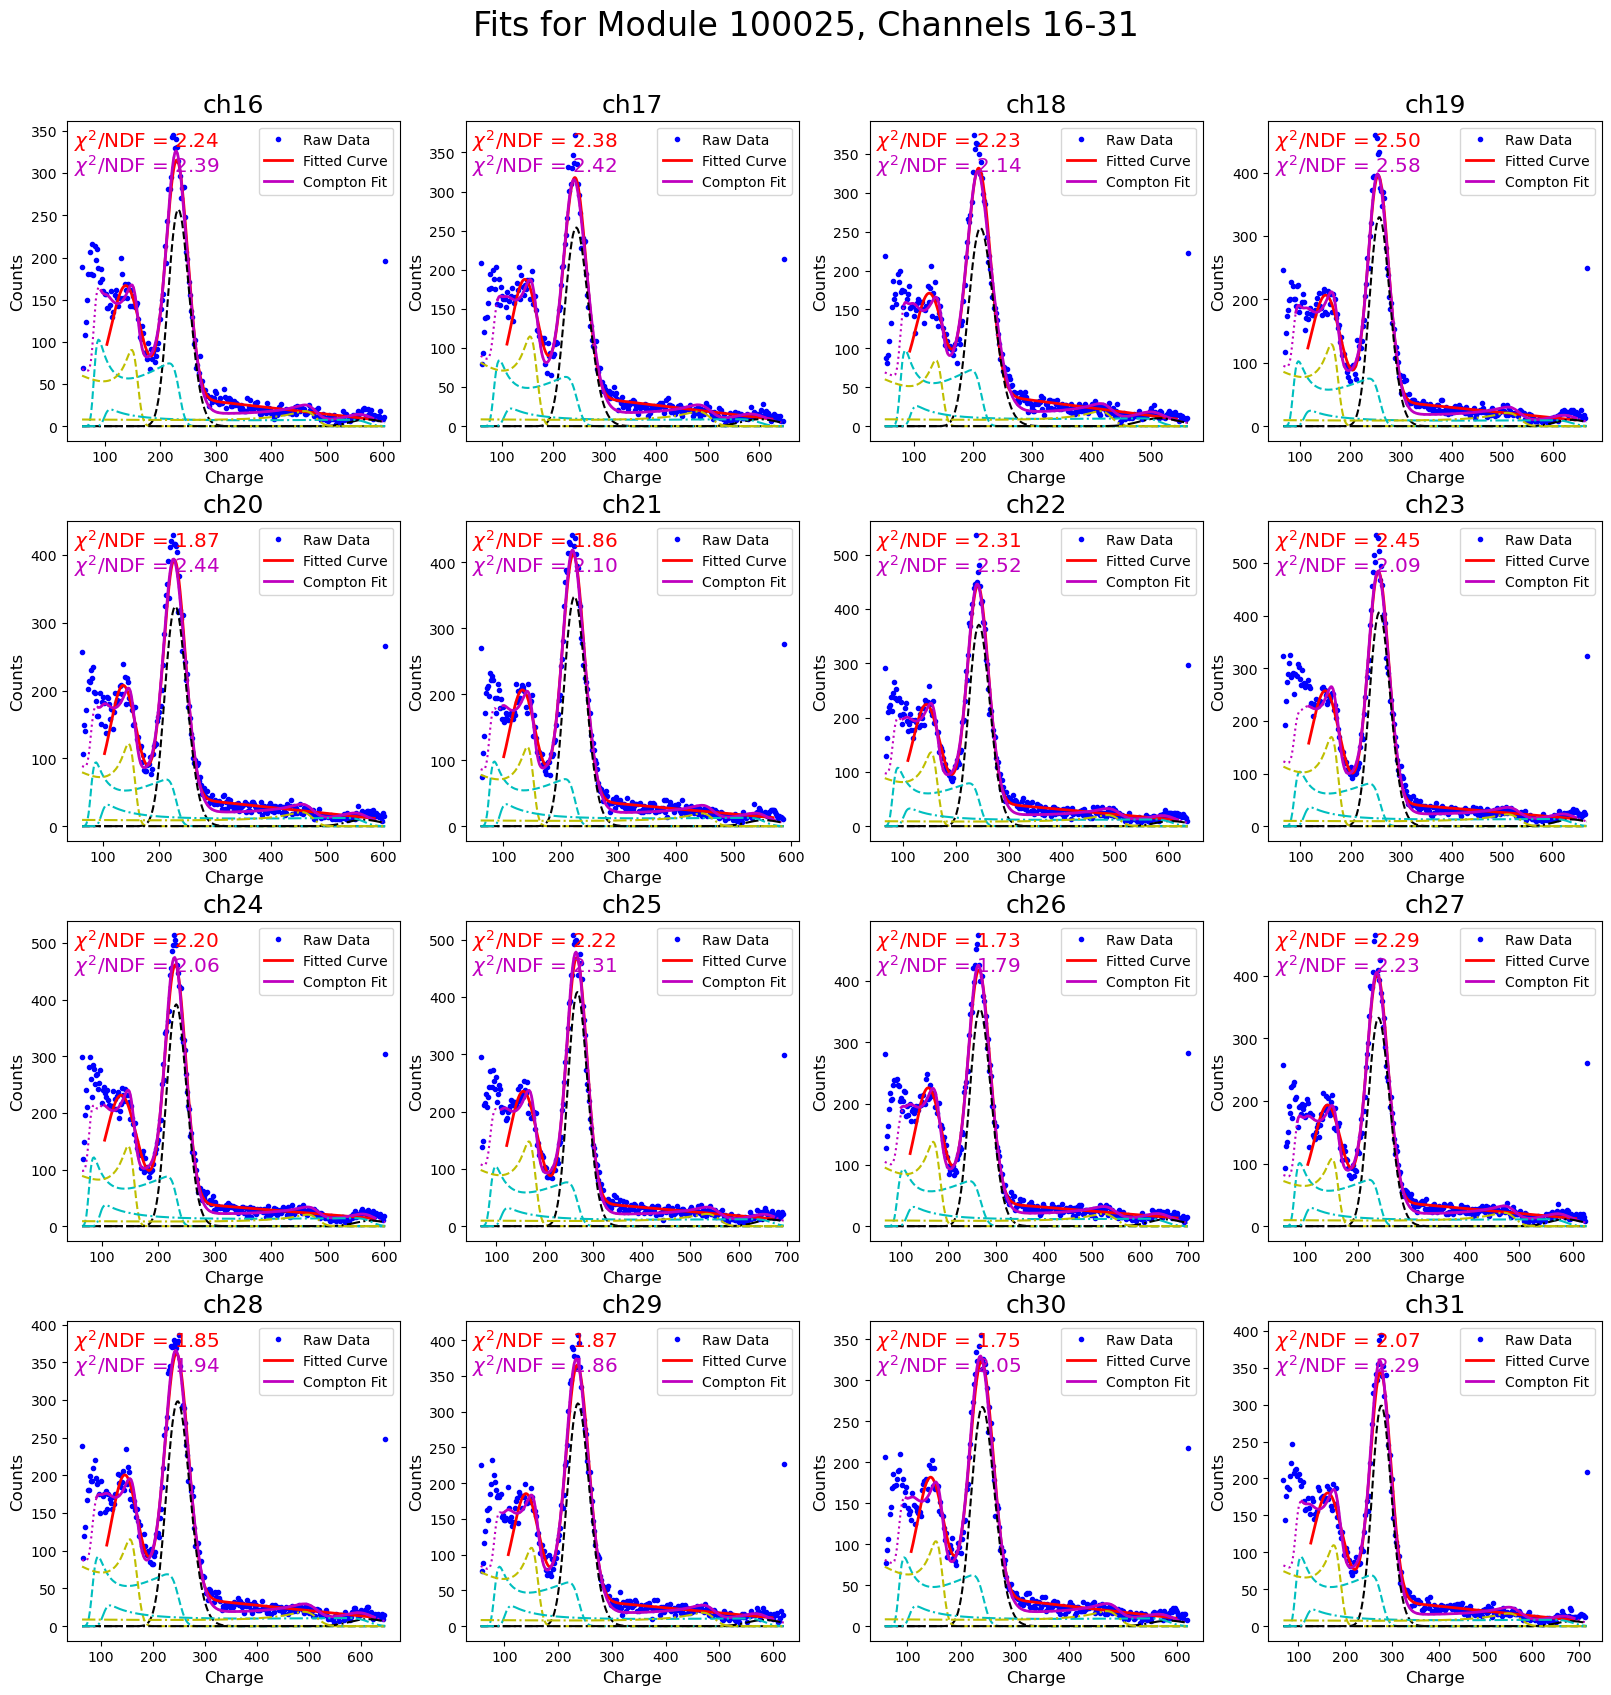

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline
 0 &  2.212 &  1.333 &   54.2 &   55.2 &  821.3 & 2214.9 &  579.1 &  843.8 & 1128.3 & 5277.1 &    0.0 \\
 1 &  1.473 &  0.915 &  113.1 &   66.3 &  796.3 & 2728.9 &  213.9 & 1557.0 &   35.4 & 4392.4 &  890.0 \\
 2 &  1.606 &  1.084 &   95.5 &   59.9 &  798.4 & 3170.0 &    0.0 & 1982.6 &  149.5 & 5996.7 &    0.0 \\
 3 &  1.644 &  1.150 &   78.7 &   58.6 &  792.0 & 3432.6 &    0.0 & 2415.8 & 3962.4 & 5528.8 & 1142.4 \\
 4 &  2.419 &  1.587 &   90.4 &   64.3 &  781.7 & 4025.2 &    0.0 & 4068.0 &  703.9 & 1861.1 & 4543.5 \\
 5 &  1.907 &  1.275 &   89.0 &   54.7 &  806.3 & 4283.9 &    0.0 & 2982.3 & 3872.7 & 8038.5 &    0.0 \\
 6 &  1.884 &  0.998 &   41.6 &   51.8 &  821.4 & 4939.8 &    0.0 & 4224.8 &  248.0 & 6582.7 & 2722.9 \\
 7 &  2.250 &  1.335 &   19.4 &  

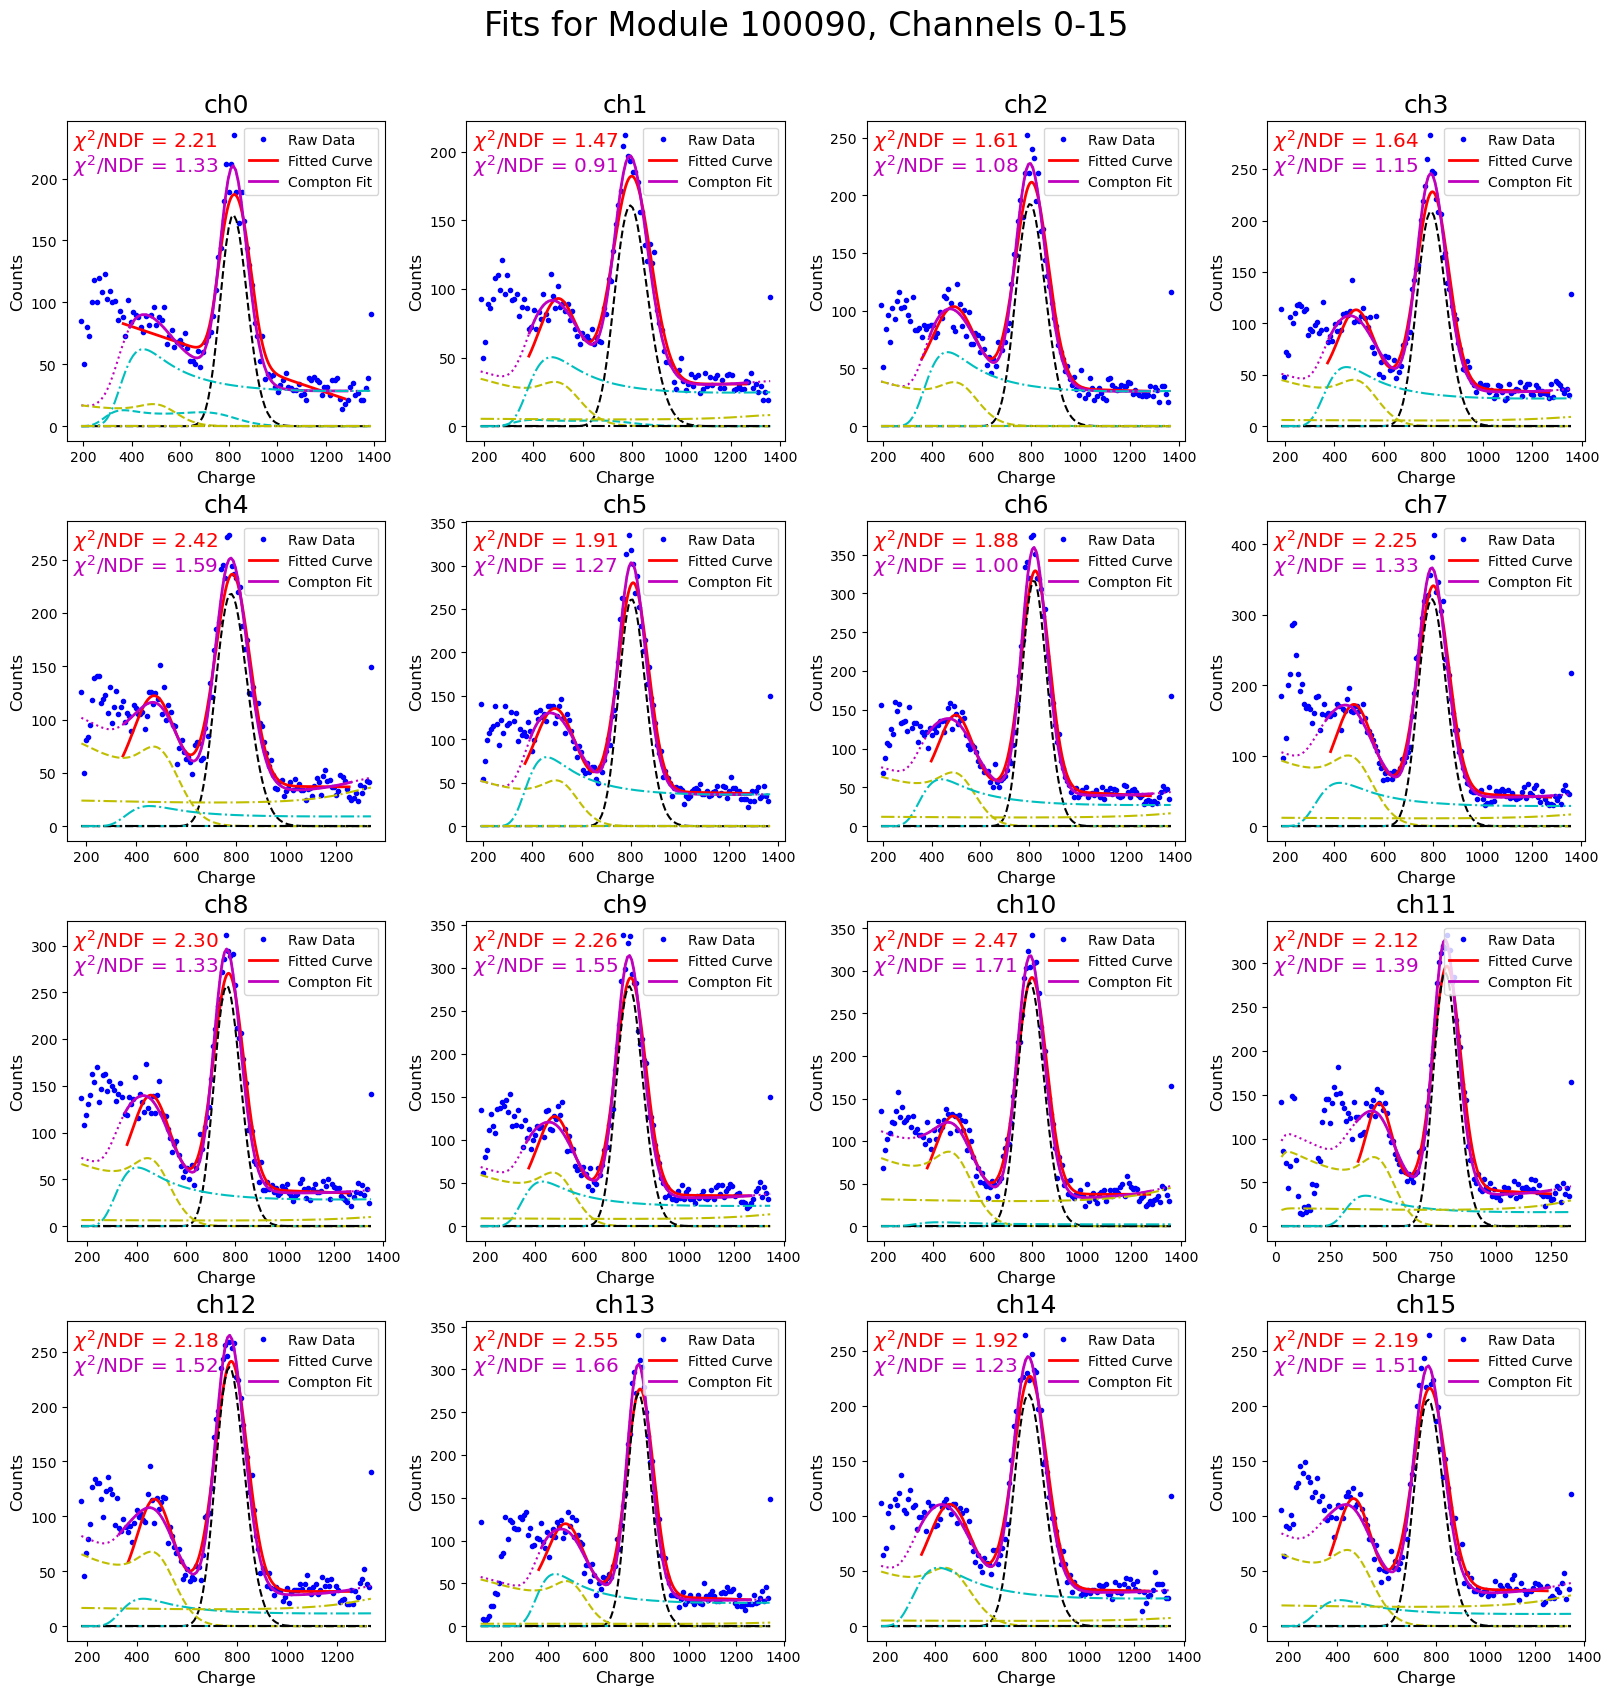

\begin{tabular}{c|cc|ccccccccc}
Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline
16 &  1.968 &  1.219 &   44.8 &   58.7 &  796.1 & 2254.0 &  369.8 & 1156.6 & 1006.3 & 5307.9 &    0.0 \\
17 &  2.328 &  1.662 &  101.3 &   74.9 &  789.5 & 2982.7 &    0.0 & 3251.1 &    2.2 & 1051.7 & 3210.5 \\
18 &  2.493 &  1.813 &   72.7 &   69.9 &  776.3 & 3298.6 &    0.0 & 3371.9 &   16.3 & 2533.8 & 2590.9 \\
19 &  1.668 &  1.167 &   75.9 &   67.3 &  817.2 & 3419.5 &    0.0 & 2434.5 & 4975.0 & 6473.4 &  126.0 \\
20 &  1.835 &  1.275 &   82.3 &   65.9 &  821.0 & 3940.2 &    0.0 & 3481.3 & 7173.1 & 5000.6 & 1868.6 \\
21 &  2.028 &  1.441 &   78.6 &   56.4 &  810.0 & 4387.0 &    0.0 & 3786.9 & 4993.5 & 5592.8 & 2173.8 \\
22 &  2.061 &  1.330 &   67.6 &   61.2 &  831.3 & 5138.5 &    0.0 & 5098.7 & 2130.8 & 3143.4 & 5136.8 \\
23 &  2.088 &  1.283 &   26.2 &  

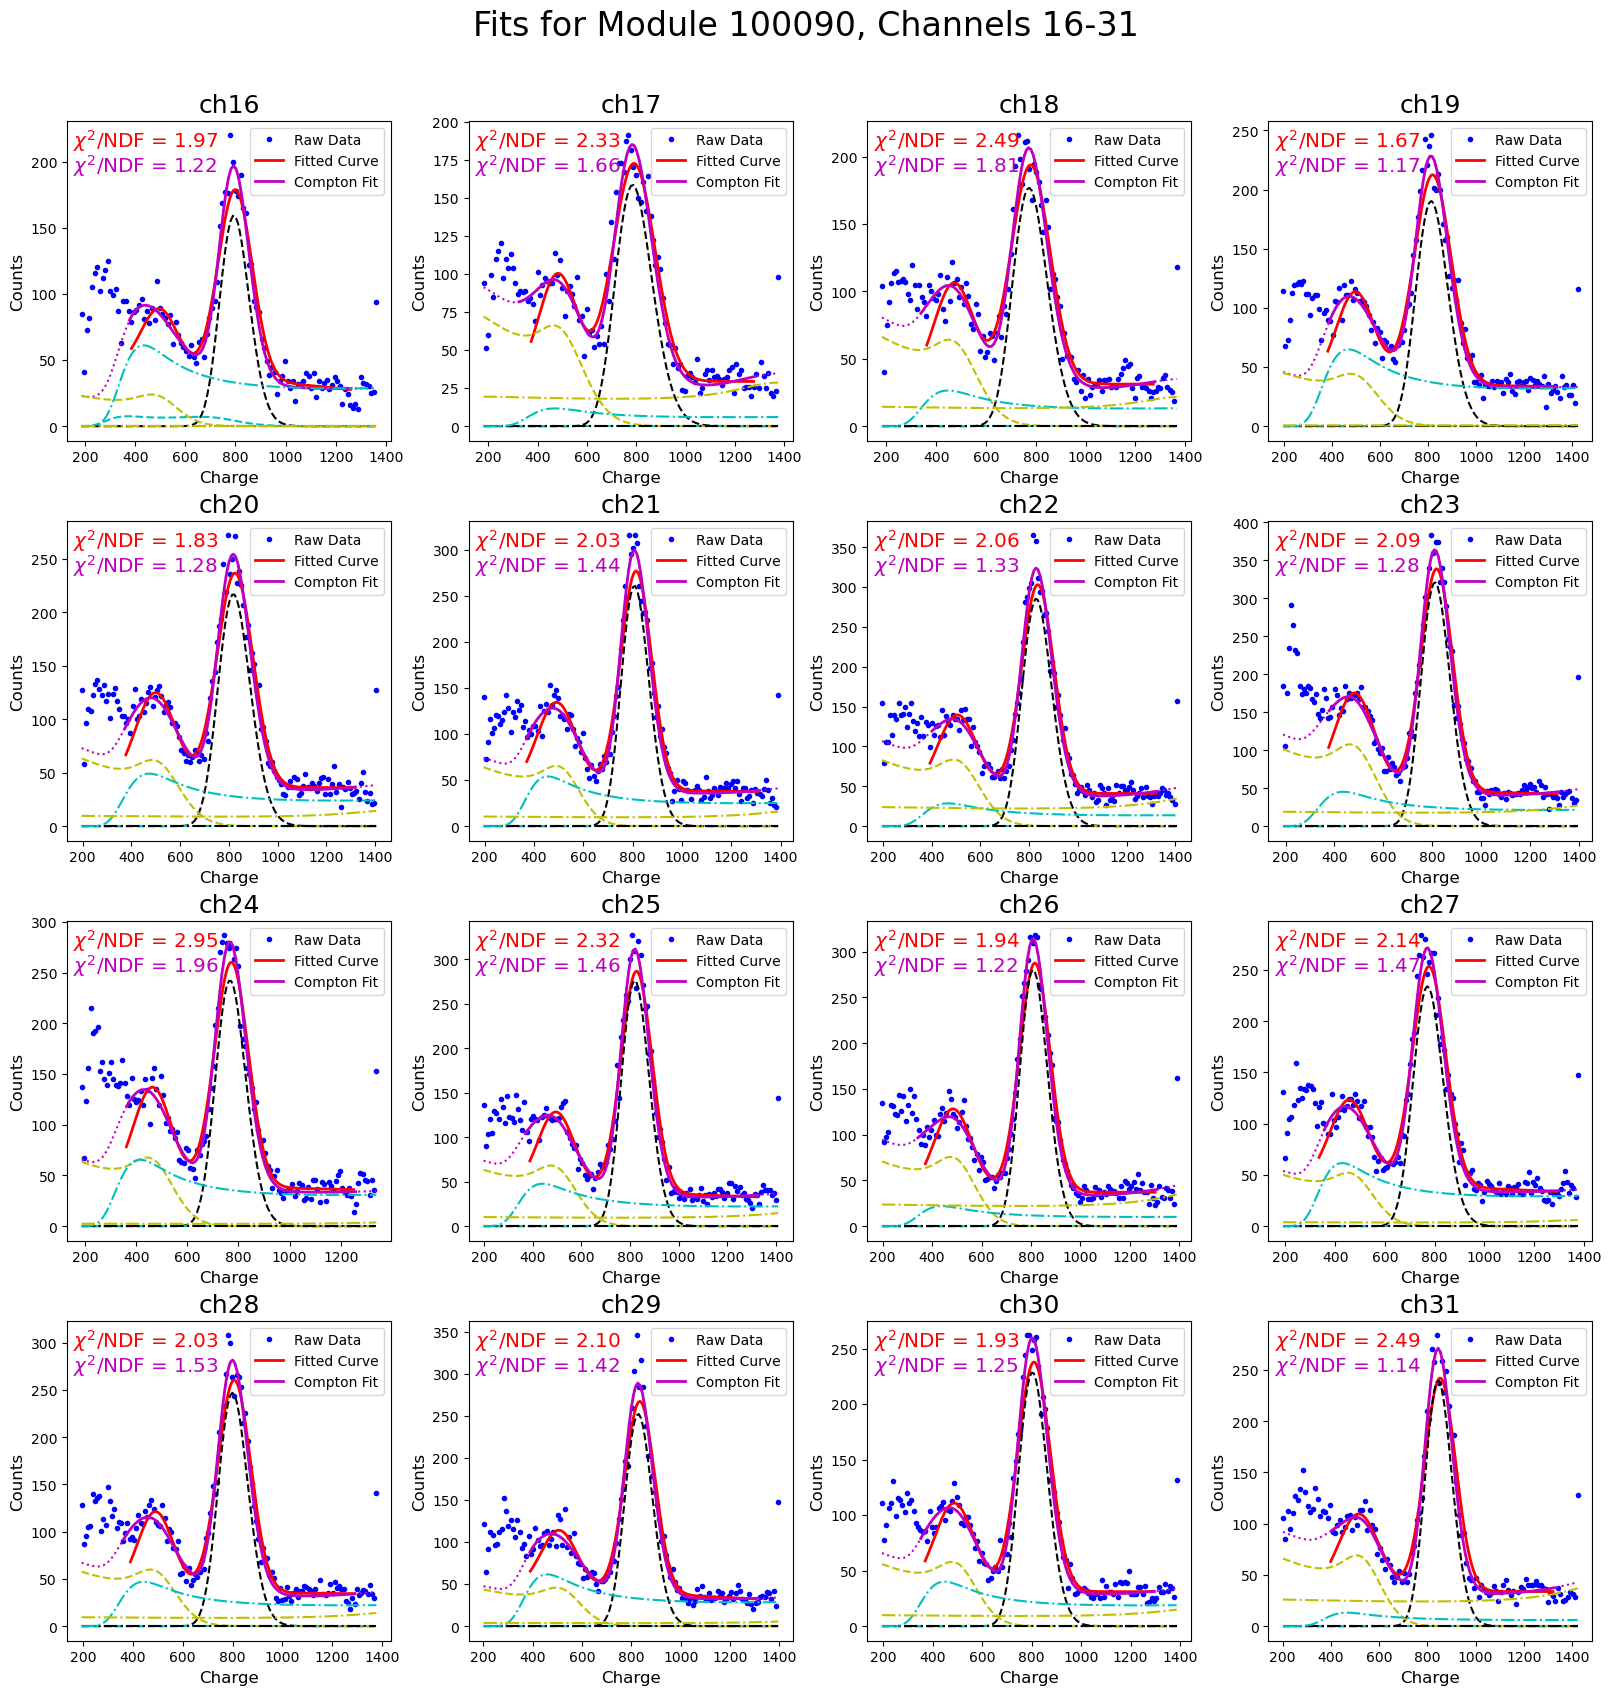

In [189]:
#file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
file_path = "module_100090_Vov3.00_Nspe10000_Nsodium100000.root"
file_paths = ["module_200040_Vov2.00_Nspe100000_Nsodium200000.root",
"module_100025_Vov2.00_Nspe100000_Nsodium200000.root",
"module_100090_Vov3.00_Nspe10000_Nsodium100000.root"]
row_num = 4; col_num = 4
#fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
#plt.figure(figsize=(30, 30))

offsets = []
sigmas = []
centers = []
chi2s = []

for file_path in file_paths:
    mid = file_path.split("_")[1]
    
    for _ch in (0, 16):
        ch = _ch+0
        print(r"\begin{tabular}{c|cc|ccccccccc}")
        print(r"Ch & Bi-modal $\frac{\chi^2}{\text{NDF}}$ & Compton $\frac{\chi^2}{\text{NDF}}$ & $o$ & $\sigma_R$ & $\mu_Q$ & $A_{511}$ & $A'_{511}$ & $A_{e,511}$ & $A_{1275}$ & $A'_{1275}$ & $A_{e,1275}$ \\ \hline")
        # print(r"Channel & Bi-modal $\chi^2$/NDF & Compton $\chi^2$/NDF & Offset & Response & Source Charge & A Source & A Backscatter & A Recoil & A Source2 & A Backscatter2 & A Recoil2 \\ \hline")

        fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
        plt.suptitle(f"Fits for Module {mid}, Channels {ch}-{ch+15}", fontsize=24, y=1.05)
        for row in range(row_num):
            for col in range(col_num):
                x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
                # print("finished modified")
                cx_original, cy_original, cx, cy, cx_fit, cy_fit, cparam_tuple, cchi2 = fit_compton(file_path, ch, "sodium")
                # print("finished compton")
                # print(cparam_tuple)
                ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
                # ax[row, col].plot(x, y, "g--", label="Smoothed Data")
                ax[row, col].plot(x_fit, y_fit, "r-", lw=2, label="Fitted Curve")
                ax[row, col].plot(cx_fit, cy_fit, "m-", lw=2, label="Compton Fit")
                ax[row, col].set_xlabel("Charge", fontsize=12)
                ax[row, col].set_ylabel("Counts", fontsize=12)
                ax[row, col].legend(loc="upper right")
                ax[row, col].set_title(f"ch{ch}", fontsize=18) #  - ({chi2:.3f}, {cchi2:.3f})

                ax[row, col].text(0.02, 0.98, f"$\chi^2$/NDF = {chi2:>4.2f}", c="r", size="x-large", ha="left", va="top", transform=ax[row,col].transAxes)
                ax[row, col].text(0.02, 0.90, f"$\chi^2$/NDF = {cchi2:>4.2f}", c="m", size="x-large", ha="left", va="top", transform=ax[row,col].transAxes)

                # centers.append([param_tuple[1], cparam_tuple[1]])
                ipp = 1 if param_tuple[1] > param_tuple[4] else 4
                offsets.append([0, cparam_tuple[0]])
                sigmas.append([param_tuple[ipp+1]/(2**0.5), cparam_tuple[1]])
                centers.append([param_tuple[ipp], cparam_tuple[2]])
                chi2s.append([chi2, cchi2])
                # print(f"{ch:>2} : " + " ".join([f"{par:>8.3f}" for par in cparam_tuple]))
                print(f"{ch:>2} & {chi2:>6.3f} & {cchi2:>6.3f} & " + " & ".join([f"{par:>6.1f}" for par in cparam_tuple]) + r" \\")
                # o, s, m1, a1, ac1, ae1, ae2, c = 0, *cparam_tuple
                # o, s, m1, a1, ac1, ae1, ae2, c = cparam_tuple
                # o, s, m1, a1, ac1, ae1, ac2, ae2 = cparam_tuple
                o, s, m1, a1, ac1, ae1, a2, ac2, ae2 = cparam_tuple
                y_spectrum = full_spectrum(x_original, *cparam_tuple) #o, s, m1, a1, ac1, ae1, ac2, ae2)
                y_sg = full_spectrum(x_original, o, s, m1, a1, 0, 0, 0, 0, 0)
                y_sc = full_spectrum(x_original, o, s, m1, 0, ac1, 0, 0, 0, 0)
                y_se = full_spectrum(x_original, o, s, m1, 0, 0, ae1, 0, 0, 0)
                y_sg2 = full_spectrum(x_original, o, s, m1, 0, 0, 0, a2, 0, 0)
                y_sc2 = full_spectrum(x_original, o, s, m1, 0, 0, 0, 0, ac2, 0)
                y_se2 = full_spectrum(x_original, o, s, m1, 0, 0, 0, 0, 0, ae2)
                # ax[row, col].plot(x_original, y_original, "k")
                ax[row, col].plot(x_original, y_spectrum, "m:")
                ax[row, col].plot(x_original, y_sg, "k--")
                ax[row, col].plot(x_original, y_sc, "c--")
                ax[row, col].plot(x_original, y_se, "y--")
                ax[row, col].plot(x_original, y_sg2, "k-.")
                ax[row, col].plot(x_original, y_sc2, "c-.")
                ax[row, col].plot(x_original, y_se2, "y-.")

                # print(f"ch{ch:<2} | Chi2 = {chi2:>5.3f} ")
                '''
                function_str = (
                f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
                f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
                f" + {m:.2f} x + {c:.2f}$"
                )
                '''
                ch+=1

        print(r"\end{tabular}")

        #plt.tight_layout()
        #plt.subplots_adjust(top=0.95)
        #fig.tight_layout(rect=[0, 0, 1, 0.98])
        plt.savefig(f"fits_module{mid}_ch{ch-16}-{ch-16}_052924.png", dpi=100, bbox_inches='tight')
        plt.show()

offsets = np.array(offsets)
sigmas = np.array(sigmas)
centers = np.array(centers)
chi2s = np.array(chi2s)


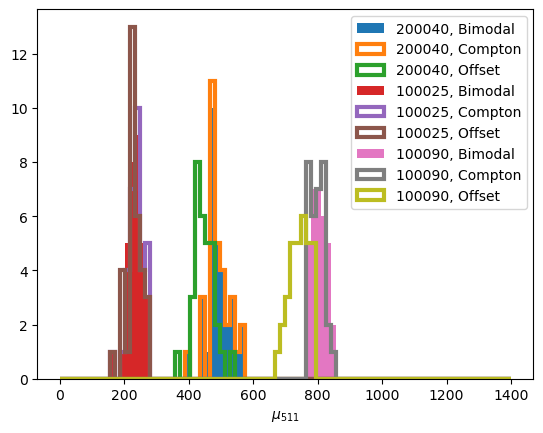

In [279]:
dc = centers[:,0] - centers[:,1]
xrange=(0,1400)
bins=90
# plt.hist(dc, bins=20, range=(-400, 400))
# plt.hist(dc, bins=20, range=(-6,6))#(dc.min(), dc.max()))
# plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
plt.hist(centers[:32,0], bins=bins, range=xrange, label=file_paths[0].split("_")[1]+", Bimodal")
plt.hist(centers[:32,1], bins=bins, range=xrange, histtype="step", label=file_paths[0].split("_")[1]+", Compton", lw=3)
plt.hist((centers-offsets)[:32,1], bins=bins, range=xrange, histtype="step", label=file_paths[0].split("_")[1]+", Offset", lw=3)
plt.hist(centers[32:64,0], bins=bins, range=xrange, label=file_paths[1].split("_")[1]+", Bimodal")
plt.hist(centers[32:64,1], bins=bins, range=xrange, histtype="step", label=file_paths[1].split("_")[1]+", Compton", lw=3)
plt.hist((centers-offsets)[32:64,1], bins=bins, range=xrange, histtype="step", label=file_paths[1].split("_")[1]+", Offset", lw=3)
plt.hist(centers[64:,0], bins=bins, range=xrange, label=file_paths[2].split("_")[1]+", Bimodal")
plt.hist(centers[64:,1], bins=bins, range=xrange, histtype="step", label=file_paths[2].split("_")[1]+", Compton", lw=3)
plt.hist((centers-offsets)[64:,1], bins=bins, range=xrange, histtype="step", label=file_paths[2].split("_")[1]+", Offset", lw=3)
plt.xlabel("$\mu_{511}$")
plt.legend()


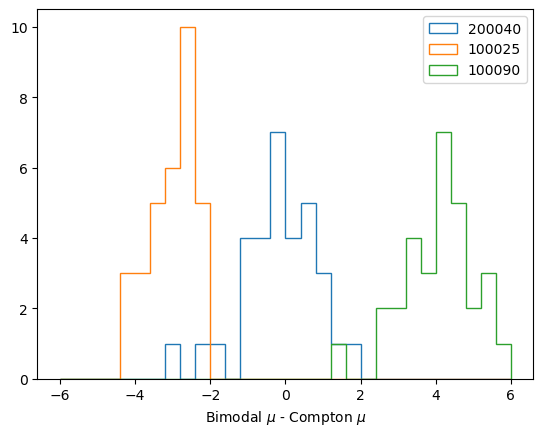

In [246]:
dc = centers[:,0] - centers[:,1]
xrange=(-6,6)
# plt.hist(dc, bins=20, range=(-400, 400))
# plt.hist(dc, bins=20, range=(-6,6))#(dc.min(), dc.max()))
# plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
plt.hist(dc[:32], bins=30, range=xrange, histtype="step", label=file_paths[0].split("_")[1])
plt.hist(dc[32:64], bins=30, range=xrange, histtype="step", label=file_paths[1].split("_")[1])
plt.hist(dc[64:], bins=30, range=xrange, histtype="step", label=file_paths[2].split("_")[1])
plt.xlabel("Bimodal $\mu$ - Compton $\mu$")
plt.legend()


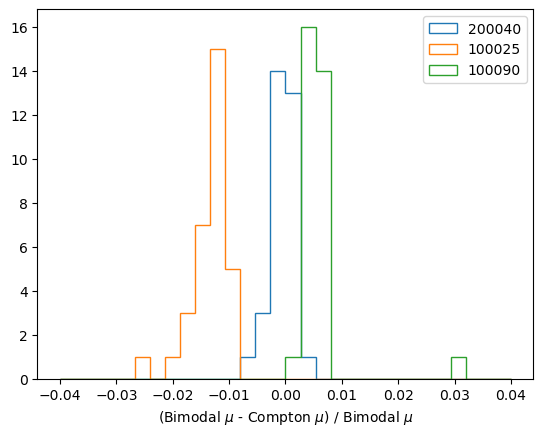

In [250]:
dc = (centers[:,0] - centers[:,1])/centers[:,0]
# dc = dc[:32]
# dc = dc[32:64]
# plt.hist(dc, bins=30)#, range=(-400, 400))
xrange=(-0.04,0.04)
plt.hist(dc[:32], bins=30, range=xrange, histtype="step", label=file_paths[0].split("_")[1])
plt.hist(dc[32:64], bins=30, range=xrange, histtype="step", label=file_paths[1].split("_")[1])
plt.hist(dc[64:], bins=30, range=xrange, histtype="step", label=file_paths[2].split("_")[1])
# plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
plt.xlabel("(Bimodal $\mu$ - Compton $\mu$) / Bimodal $\mu$")
plt.legend()


Text(0.5, 0, 'Bimodal $\\mu$ - Compton ($\\mu$-o)')

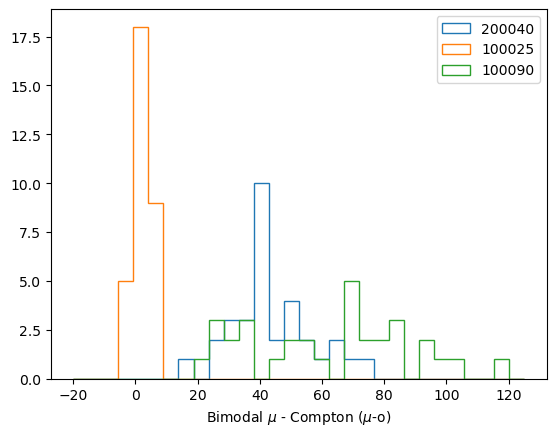

In [244]:
dc = centers[:,0] - (centers[:,1]-offsets[:,1])
xrange=(-20,125)
# plt.hist(dc, bins=20, range=(-400, 400))
# plt.hist(dc, bins=20)#, range=(-400, 400))
# plt.hist(dc, bins=20, range=(-20,125))#(dc.min(), dc.max()))
# plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
plt.hist(dc[:32], bins=30, range=xrange, histtype="step", label=file_paths[0].split("_")[1])
plt.hist(dc[32:64], bins=30, range=xrange, histtype="step", label=file_paths[1].split("_")[1])
plt.hist(dc[64:], bins=30, range=xrange, histtype="step", label=file_paths[2].split("_")[1])
plt.legend()
plt.xlabel("Bimodal $\mu$ - Compton ($\mu$-o)")


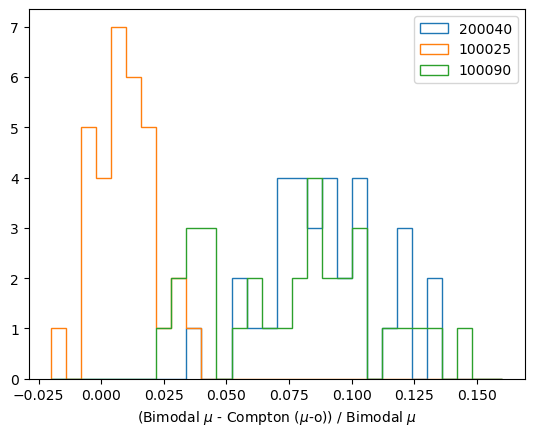

In [248]:
dc = (centers[:,0] - (centers[:,1]-offsets[:,1]))/centers[:,0]
# dc = dc[:32]
# dc = dc[32:64]
# plt.hist(dc, bins=30)#, range=(-400, 400))
xrange=(-0.02,0.16)
plt.hist(dc[:32], bins=30, range=xrange, histtype="step", label=file_paths[0].split("_")[1])
plt.hist(dc[32:64], bins=30, range=xrange, histtype="step", label=file_paths[1].split("_")[1])
plt.hist(dc[64:], bins=30, range=xrange, histtype="step", label=file_paths[2].split("_")[1])
# plt.hist(dc, bins=20, range=(dc.min(), dc.max()))
plt.xlabel("(Bimodal $\mu$ - Compton ($\mu$-o)) / Bimodal $\mu$")
plt.legend()


-8.016926498371099 1.3724168374774948 11.312827756253498


Text(0.5, 0, 'Bimodal $\\sigma$ - Compton $\\sigma$')

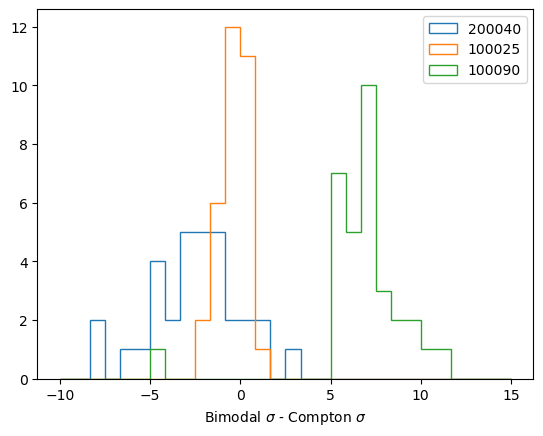

In [261]:
ds = sigmas[:,0] - sigmas[:,1]
print(ds.min(), ds.mean(), ds.max())
# plt.hist(dc, bins=20, range=(-400, 400))
# plt.hist(sigmas[:,0], bins=20, range=(-60,90))#(dc.min(), dc.max()))
# plt.hist(sigmas[:,1], bins=20, range=(-60,90))#(dc.min(), dc.max()))
xrange=(-10,15)
plt.hist(ds[:32], bins=30, range=xrange, histtype="step", label=file_paths[0].split("_")[1])
plt.hist(ds[32:64], bins=30, range=xrange, histtype="step", label=file_paths[1].split("_")[1])
plt.hist(ds[64:], bins=30, range=xrange, histtype="step", label=file_paths[2].split("_")[1])
plt.legend()
plt.xlabel("Bimodal $\sigma$ - Compton $\sigma$")


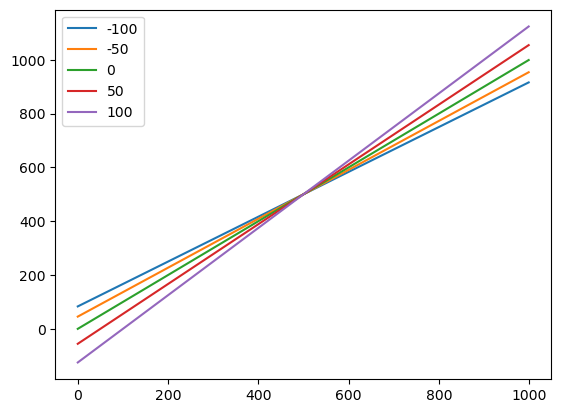

In [193]:
x = np.arange(0, 1000)
m1 = 500

for o in [-100, -50, 0, 50, 100]:
    plt.plot(x, 500 * (x - o)/(m1 - o), label = o)
plt.legend()

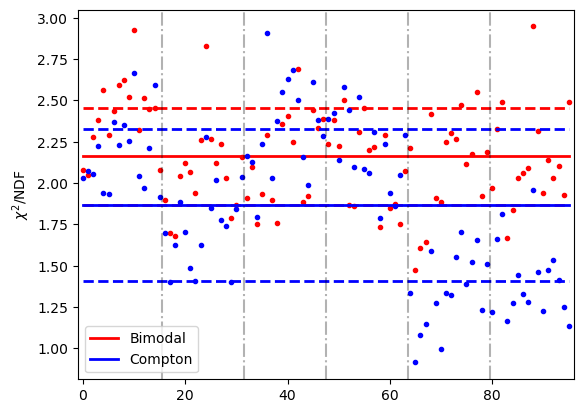

In [194]:
x = np.arange(len(chi2s[:,0]))
plt.plot(chi2s[:,0], "r.")
x2_ave, x2_m1s, x2_p1s = chi2s[:,0].mean(), chi2s[:,0].mean() - chi2s[:,0].std(), chi2s[:,0].mean() + chi2s[:,0].std()
plt.plot([x[0],x[-1]],[x2_ave,x2_ave],"r-", lw=2, label="Bimodal")
plt.plot([x[0],x[-1]],[x2_m1s,x2_m1s],"r--", lw=2)
plt.plot([x[0],x[-1]],[x2_p1s,x2_p1s],"r--", lw=2)
plt.plot(chi2s[:,1], "b.")
x2_ave, x2_m1s, x2_p1s = chi2s[:,1].mean(), chi2s[:,1].mean() - chi2s[:,1].std(), chi2s[:,1].mean() + chi2s[:,1].std()
plt.plot([x[0],x[-1]],[x2_ave,x2_ave],"b-", lw=2, label="Compton")
plt.plot([x[0],x[-1]],[x2_m1s,x2_m1s],"b--", lw=2)
plt.plot([x[0],x[-1]],[x2_p1s,x2_p1s],"b--", lw=2)

ymin, ymax =  chi2s.min(), chi2s.max()
ymin, ymax = ymin - (ymax-ymin)*0.05, ymax + (ymax-ymin)*0.05

for i in range(1,chi2s.shape[0]//16):
    plt.plot([i*16-0.5,i*16-0.5], [ymin, ymax], "k-.", alpha=0.3)
plt.ylabel("$\chi^2$/NDF")
plt.xlim(x[0]-1,x[-1]+1)
plt.ylim(ymin,ymax)
plt.legend()


Text(0, 0.5, 'Compton $\\chi^2$/NDF')

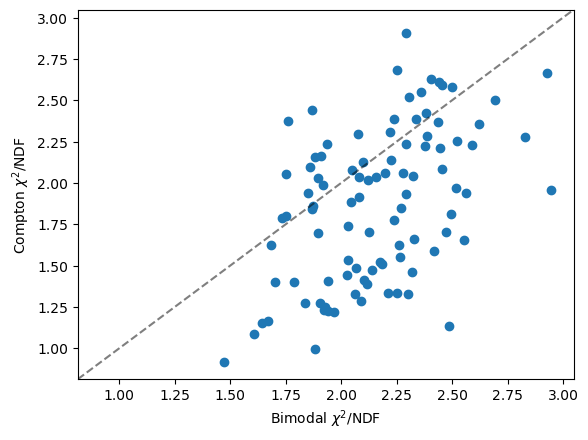

In [195]:
plt.scatter(chi2s[:,0], chi2s[:,1])

ymin, ymax =  chi2s.min(), chi2s.max()
ymin, ymax = ymin - (ymax-ymin)*0.05, ymax + (ymax-ymin)*0.05

plt.plot([ymin,ymax],[ymin,ymax],"k--", alpha=0.5)
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
plt.xlabel("Bimodal $\chi^2$/NDF")
plt.ylabel("Compton $\chi^2$/NDF")

In [196]:
# file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# #file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# # file_path = "module_200060_Vov3.00_Nspe10000_Nsodium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 16

# plt.suptitle("Fits for Module 200040, Channels 16-31", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module200060_ch16-31_052924.png", dpi=100, bbox_inches='tight')
# plt.show()



In [197]:
# file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# #file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 16

# plt.suptitle("Fits for Module 200040, Channels 16-31", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_051424_module200040_ch16-31_052124_2_adjustLinear.png", dpi=100, bbox_inches='tight')
# plt.show()



In [198]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100025_Vov2.00_Nspe100000_Nsodium200000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Fits for Module 100025, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "sodium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_051424_module100025_ch0-15_052124_2.png", dpi=100, bbox_inches='tight')
# plt.show()



In [199]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_100090_Vov3.00_Nspe10000_Ncesium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Cesium Fits for Module 100090, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "cesium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module100090_cesium_ch0-15_052924.png", dpi=100, bbox_inches='tight')
# plt.show()



In [200]:
# #file_path = "module_200040_Vov2.00_Nspe100000_Nsodium200000.root"
# file_path = "module_200060_Vov3.00_Nspe10000_Ncesium100000.root"
# row_num = 4; col_num = 4
# #fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# fig, ax = plt.subplots(row_num,col_num, figsize=(16, 16), constrained_layout=True)
# #plt.figure(figsize=(30, 30))
# ch = 0

# plt.suptitle("Cesium fits for Module 200060, Channels 0-15", fontsize=24, y=1.05)
# for row in range(row_num):
#     for col in range(col_num):
#         x_original, y_original, x, y, x_fit, y_fit, param_tuple, chi2 = fit_modified(file_path, ch, "cesium")
        
#         ax[row, col].plot(x_original, y_original, "b.", label="Raw Data")
#         ax[row, col].plot(x, y, "g", label="Smoothed Data", linestyle="--")
#         ax[row, col].plot(x_fit, y_fit, "r-", label="Fitted Curve")
#         ax[row, col].set_xlabel("Charge", fontsize=12)
#         ax[row, col].set_ylabel("Counts", fontsize=12)
#         ax[row, col].legend()
#         ax[row, col].set_title(f"ch{ch} - {chi2}", fontsize=18)
#         '''
#         function_str = (
#             f"$y = {a1:.2f} e^{{-\\left(\\frac{{x - {m1:.2f}}}{{{s1:.2f}}}\\right)^2}}"
#             f" + {a2:.2f} e^{{-\\left(\\frac{{x - {m2:.2f}}}{{{s2:.2f}}}\\right)^2}}"
#             f" + {m:.2f} x + {c:.2f}$"
#         )
#         '''
#         ch+=1
# #
# #plt.tight_layout()
# #plt.subplots_adjust(top=0.95)
# #fig.tight_layout(rect=[0, 0, 1, 0.98])
# plt.savefig("fits_module200060_cesium_ch0-15_052924.png", dpi=100, bbox_inches='tight')
# plt.show()

